In [1]:
# Supress Warning
import warnings
warnings.filterwarnings('ignore')

### Import required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read and Understand the dataset

In [3]:
Lead_data = pd.read_csv("Leads.csv")
Lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

### Check the dimension of the dataset

In [4]:
Lead_data.shape

(9240, 37)

### Let's check the statistical aspect of the dataset

In [5]:
Lead_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### Check the type of each column

In [7]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### Observation - 
There is lots of categorical variable which needs to convert to dummy variable and need to take care of null values as well.

# Data Cleaning and Data Manipulation

### Check if the column "Prospect ID" and "Lead Number" has duplicates 

In [8]:
duplicate_lead_no = Lead_data.duplicated(subset="Lead Number")
print(sum(duplicate_lead_no)==0)

True


In [9]:
duplicate_prospect_id = Lead_data.duplicated(subset="Prospect ID")
print(sum(duplicate_prospect_id)==0)

True


##### Observation -
We have noticed there is no duplicates under Prospect ID and Lead Number.

### Dropping "Prospect ID" and "Lead Number"

In [10]:
Lead_data.drop(['Prospect ID','Lead Number'], axis=1, inplace = True)

##### Observation-
As these two are not useful for our analysis, better to remove them

In [11]:
Lead_data.shape

(9240, 35)

### Checking number of missing values in each column

In [12]:
Lead_data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

### Check percentage of missing values

In [13]:
(Lead_data.isnull().sum()/len(Lead_data))*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

### Checking null value for 'Lead Quality' column

In [14]:
Lead_data['Lead Quality'].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [15]:
Lead_data['Lead Quality'].isnull().sum()

4767

### Replace missing values with 'Unknown'

In [16]:
Lead_data['Lead Quality'] = Lead_data['Lead Quality'].fillna("Unknown")

In [17]:
Lead_data['Lead Quality'].isnull().sum()

0

In [18]:
Lead_data['Lead Quality'].value_counts()

Lead Quality
Unknown              4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

### Identify those columns who has more than 40% missing values

In [19]:
cut_off=40
cols_to_drop = list(Lead_data.columns[Lead_data.isnull().mean()*100>cut_off])
print(cols_to_drop)

['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


### Removing columns with more than 40% missing value

In [20]:
Lead_data = Lead_data.drop(cols_to_drop, axis=1)

### Rechecking null values

In [21]:
((Lead_data.isnull().sum()/len(Lead_data))*100).sort_values(ascending=False)

Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Quality                                      0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Get updates on DM Content                         0.000000
Through Recommendations                           0.0000

### Finding columns which have 'select' value available

In [22]:
col = list(Lead_data.columns)
for i in col:
    if 'Select' in Lead_data[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


In [23]:
Lead_data['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [24]:
Lead_data['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [25]:
Lead_data['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [26]:
Lead_data['City'].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

### Replacing 'Select' values with null value

In [27]:
Lead_data=Lead_data.replace('Select',np.nan)

### Rechecking columns with null values more than 15%

In [28]:
col=(Lead_data.isnull().sum()/len(Lead_data))*100
col = col[col>=15]
print(col)

Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Profile                                     74.188312
City                                             39.707792
dtype: float64


In [29]:
col = col.index.tolist()
print(col)

['Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Profile', 'City']


### Relace Null value with 'Not Specified' value

In [30]:
for i in col:
    Lead_data[i]=Lead_data[i].fillna('Not Specified')

In [31]:
Lead_data.isnull().sum()

Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
How did you hear about X Education                 0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                     

### Remove rows with less null values

In [32]:
Lead_data=Lead_data.dropna()

In [33]:
Lead_data.shape

(9074, 31)

In [34]:
Lead_data.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [35]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

### Checking value counts of each column

In [36]:
for column in Lead_data:
    print(Lead_data[column].astype('category').value_counts())
    print('-----------------------------------')

Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64
-----------------------------------
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
-----------------------------------
Do Not Email
No     8358
Yes     716
Name: count, dtype: int64
-----------------------------------
Do Not Call
No     9072
Yes       2
Name: count, dtype: int64
-----------------

### Dropping irrelevant columns

In [37]:
Col_drop = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
            'Get updates on DM Content', 'I agree to pay the amount through cheque']

In [38]:
Lead_data.drop(Col_drop, axis=1, inplace=True)

##### Observation-
##### Magazine - value of these variable is No, so removed them.
##### Receive More Updates About Our Courses - value of these variable is No, so removed them.
##### Update me on Supply Chain Content - value of these variable is No, so removed them.
##### Get updates on DM Content - value of these variable is No, so removed them.
##### I agree to pay the amount through cheque - value of these variable is No, so removed them.

### Rechecking dimension of the dataset

In [39]:
Lead_data.shape

(9074, 26)

In [40]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

# Explanatory Data Analysis

### Visualization of Numerical Variable using Pairplot

<Figure size 2000x800 with 0 Axes>

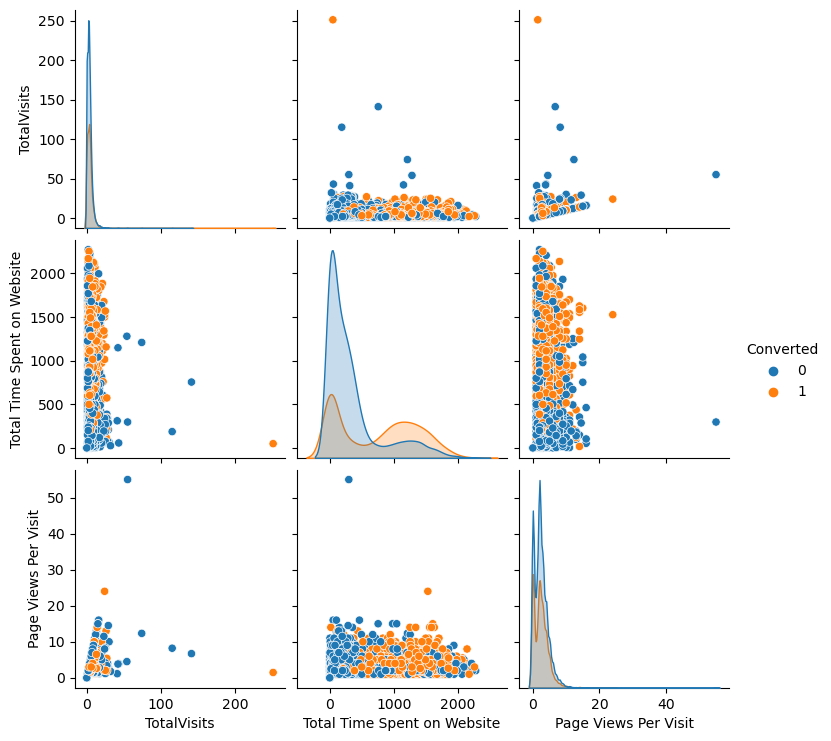

In [41]:
Num_col = Lead_data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']]
plt.figure(figsize=[20,8])
sns.pairplot(Num_col,hue='Converted', diag_kind='kde')
plt.show()

##### Observation -
##### Total Visits - customers has lesser number of visits.
##### Total time spent on website - Intially total time spent is low, after getting potential leads, they spent time on company's website.
##### Page views per visit - Pages view per visit is low.

### Visualization of heatmap among variables

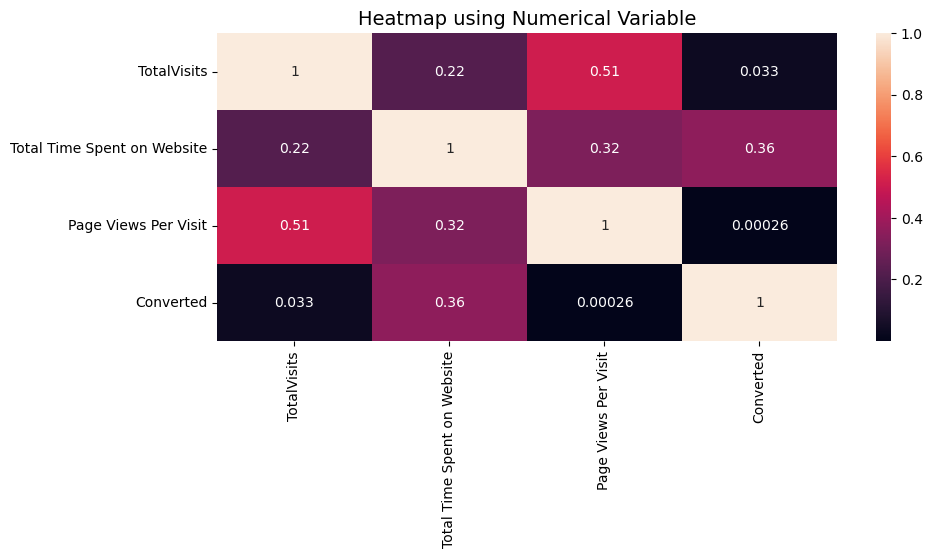

In [43]:
Num_col = Lead_data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']]
plt.figure(figsize=[10,4])
sns.heatmap(Num_col.corr(),annot=True)
plt.title("Heatmap using Numerical Variable", fontsize=14)
plt.show()

##### Observation -
##### 'TotalVisits' and 'Page Views Per Visit' have strong correlations
##### 'TotalVisits' and 'Total Time Spent on Website' have low correlations

### Checking value counts of the traget variable - 'Converted'

In [45]:
Lead_data['Converted'].value_counts()

Converted
0    5639
1    3435
Name: count, dtype: int64

##### Observation -
##### 0 implies not converted to lead
##### 1 imples successfully converted to lead

### Calculate Conversion Rate

In [46]:
Conversion_rate = (sum(Lead_data['Converted'])/len(Lead_data['Converted'].index))*100
print(Conversion_rate)

37.85541106458012


### plot for 'Converted' column

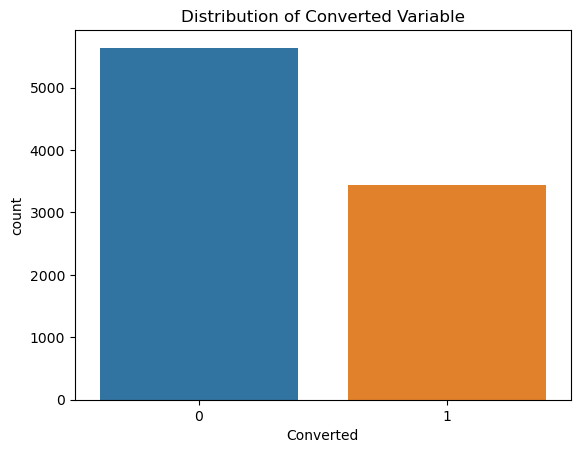

In [47]:
sns.countplot(x='Converted', data=Lead_data)
plt.title("Distribution of Converted Variable")
plt.show()

##### Observation -
##### Company needs to focus more on conversion rate and very less no of people are leads

### Plot for 'Last Activity'

In [48]:
Lead_data['Last Activity'].value_counts()

Last Activity
Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

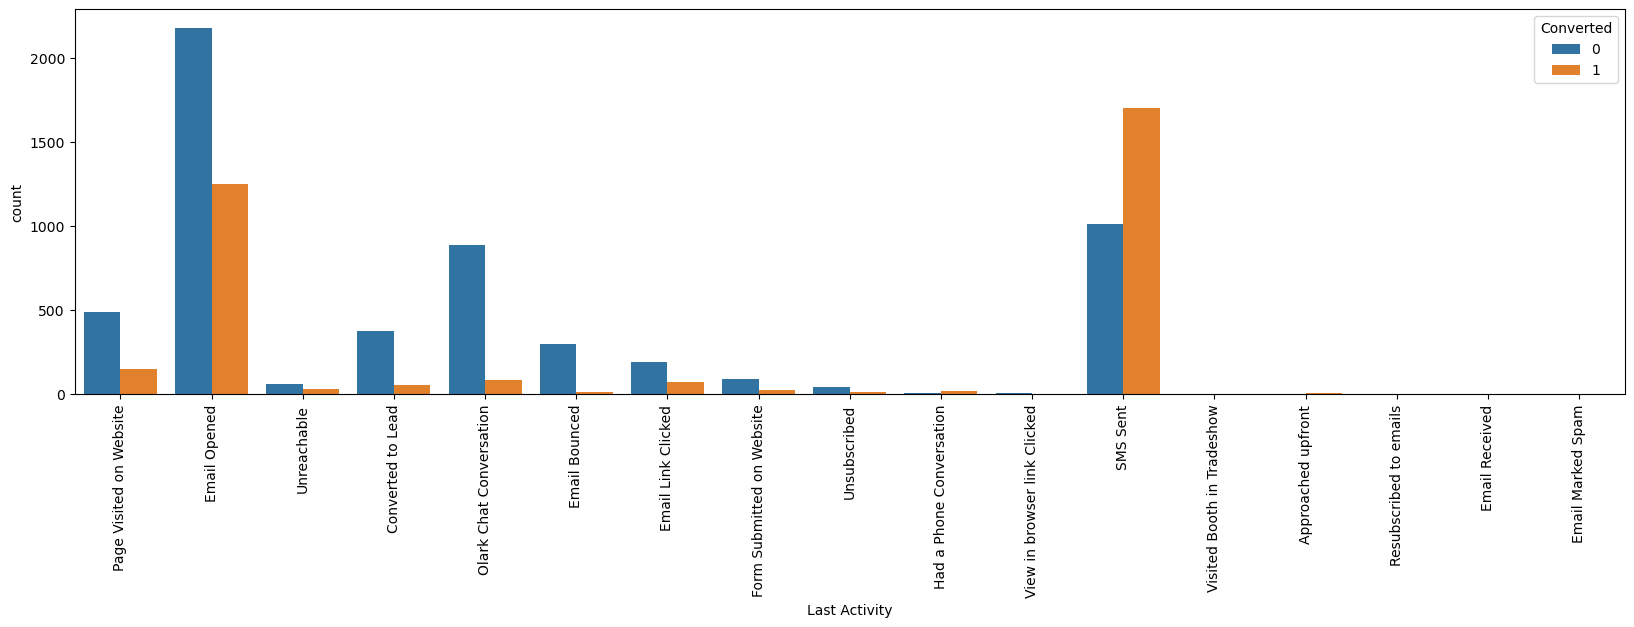

In [49]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='Last Activity', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('Last Activity')
plt.show()

##### Observation
##### Sms sent has high conversion rate in last activity. Email opened and others have less conversion rate

### Plot for 'Lead Origin'

In [51]:
Lead_data['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64

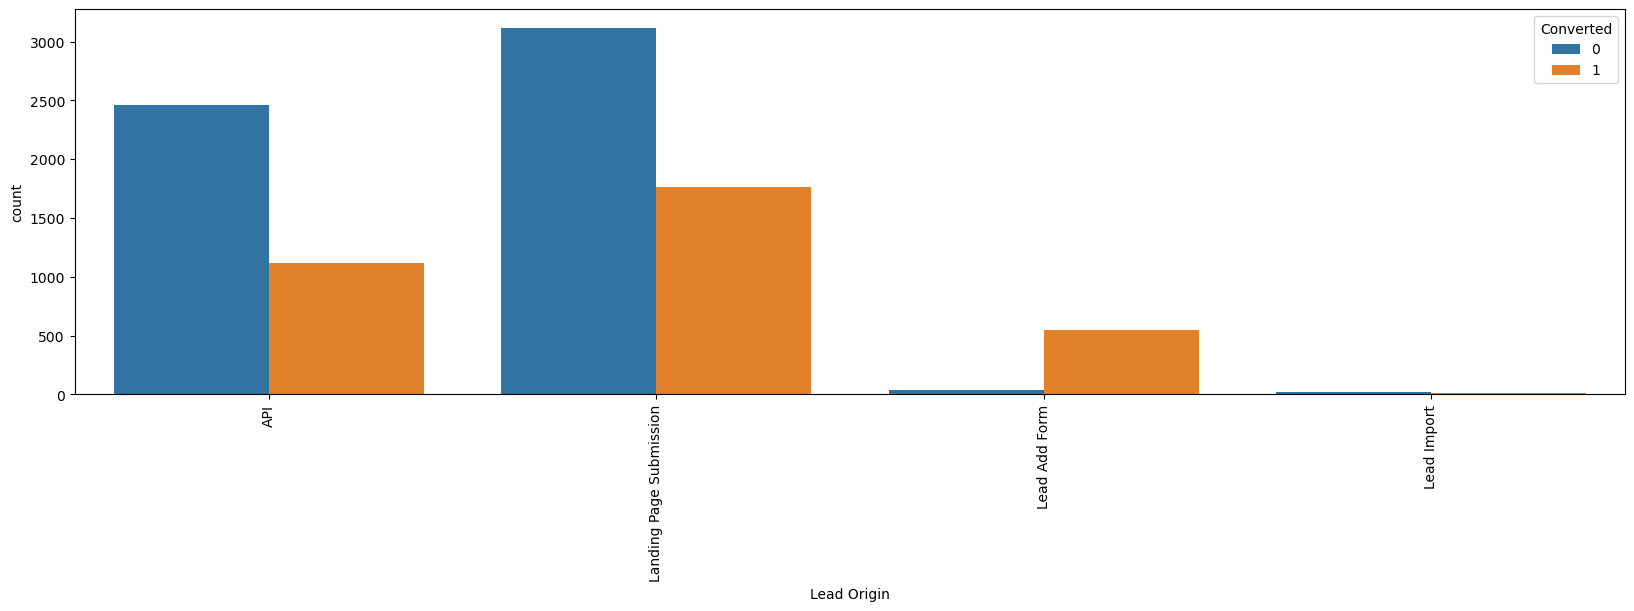

In [52]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='Lead Origin', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('Lead Origin')
plt.show()

##### Observation
##### API and Landing page submission has high conversion rate, Lead add form has more leads and conversion is very low for lead import

### Plot for 'Lead Source' column

In [53]:
Lead_data['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [54]:
Lead_data['Lead Source'] = Lead_data['Lead Source'].replace('google','Google')

In [55]:
Lead_data['Lead Source'].value_counts()

Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

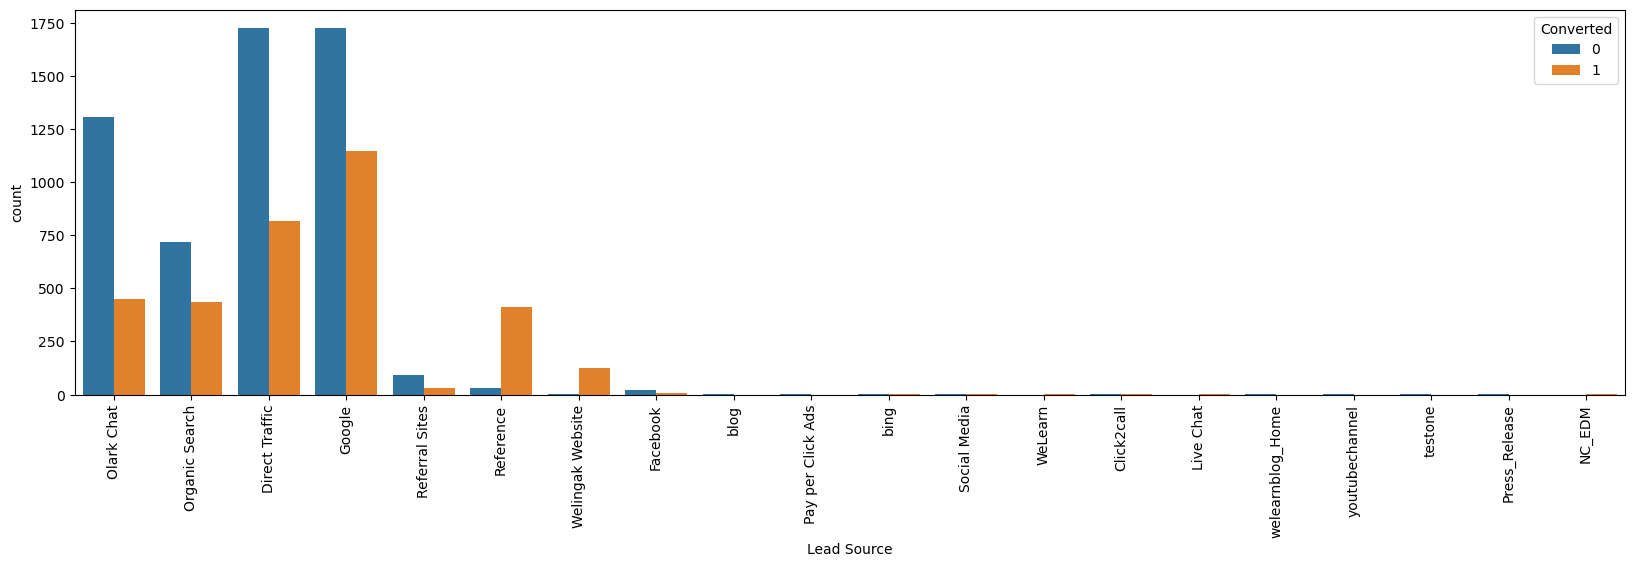

In [56]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='Lead Source', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('Lead Source')
plt.show()

##### Observation-
##### for organic search, direct traffic, Reference, Google, Welingak Website no of leads are very high and people like to convert where as blog, youtube channel and other social platform people are less likely to convert

### Plot for 'Tags' column

In [57]:
Lead_data['Tags'].value_counts()

Tags
Not Specified                                        3327
Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch 

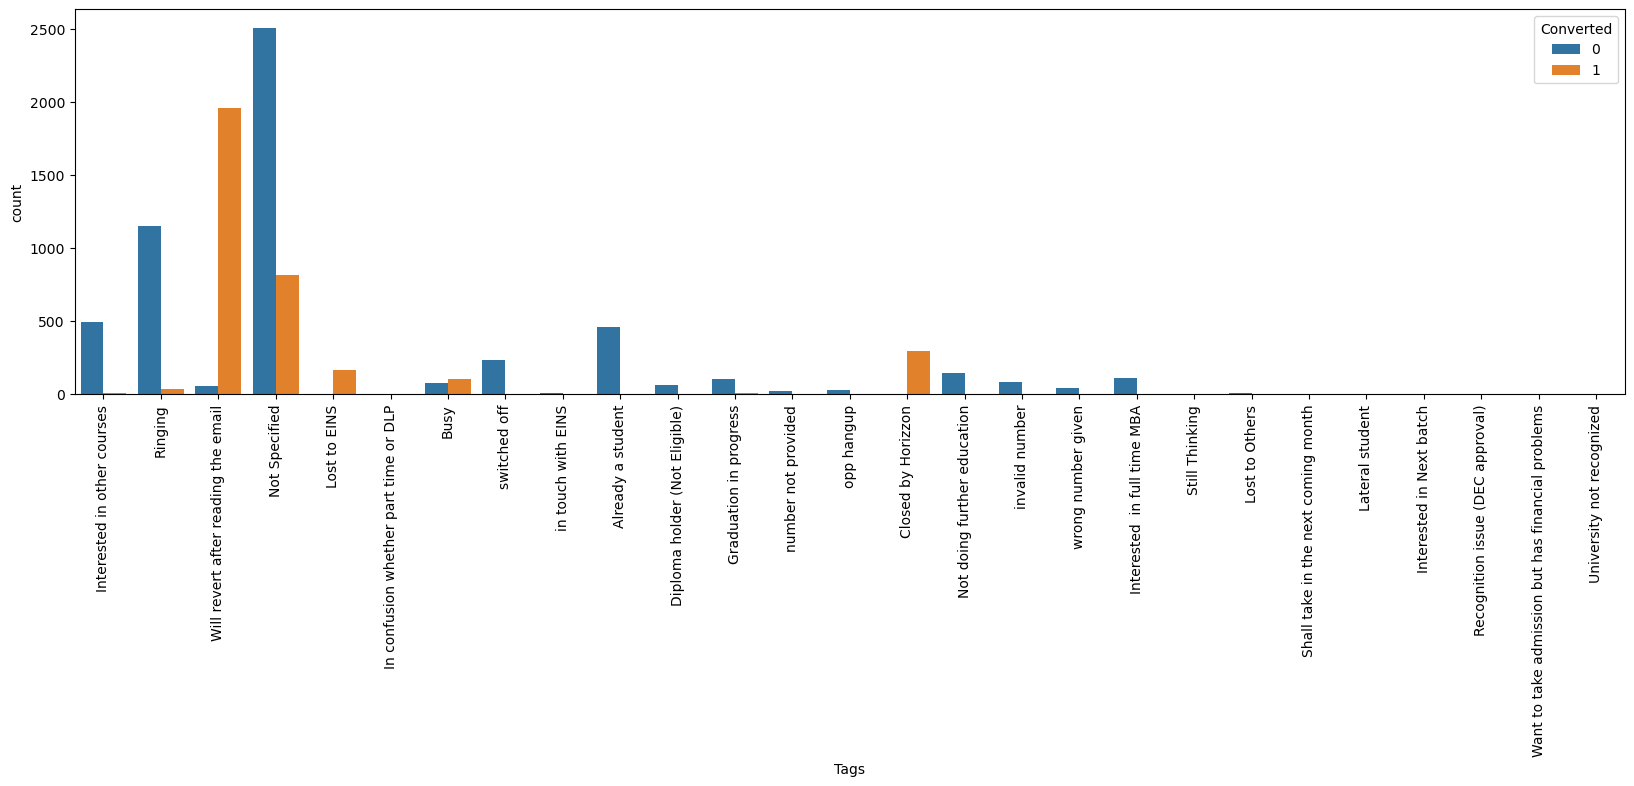

In [58]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='Tags', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('Tags')
plt.show()

##### Observation
##### People revert after reading the email is very high for leads amd for most of the customer data is not mentioned.

### Plot for 'Specialization' column

In [59]:
Lead_data['Specialization'].value_counts()

Specialization
Not Specified                        3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

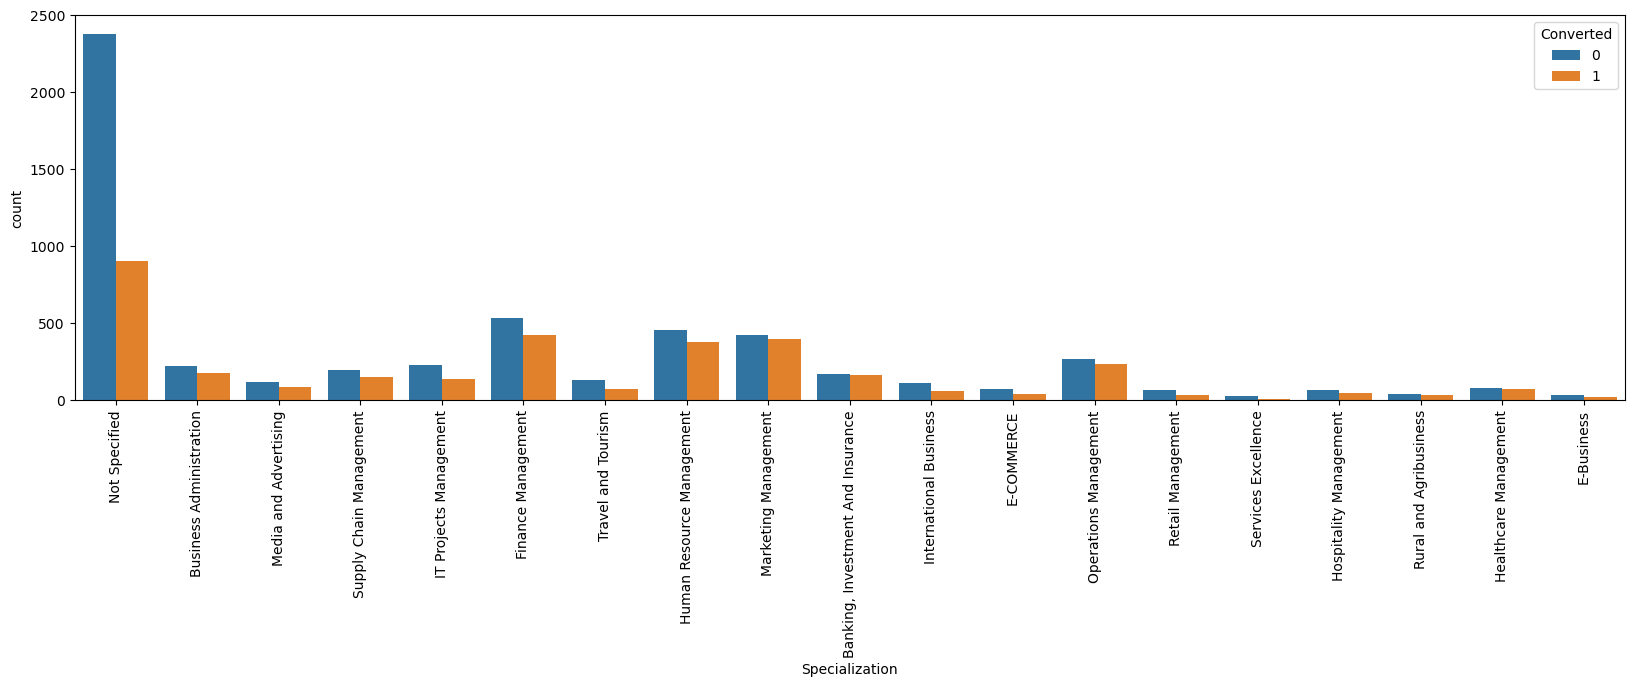

In [60]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='Specialization', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('Specialization')
plt.show()

##### Observation-
##### Most of the customer are not interested to mention about their specialization but management people has high conversion rate and lead as well.

### Plot for 'What is your current occupation'

In [61]:
Lead_data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5476
Not Specified           2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: count, dtype: int64

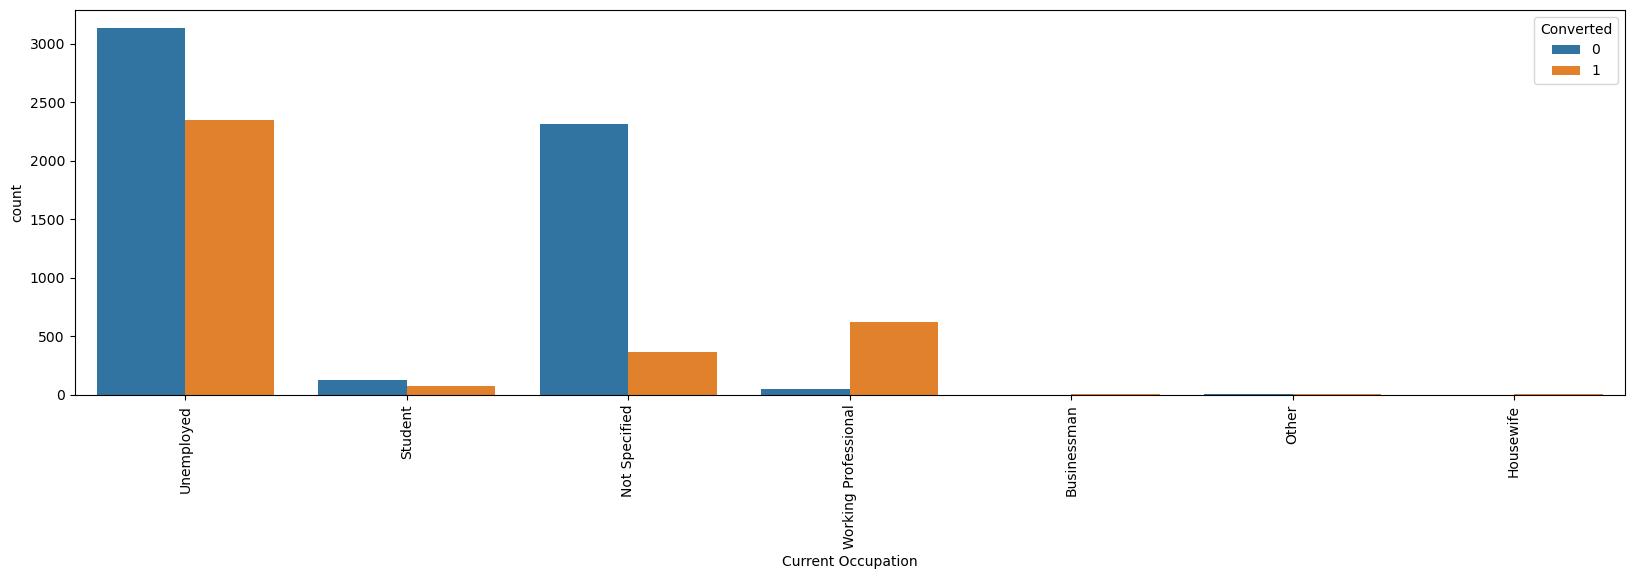

In [62]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='What is your current occupation', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('Current Occupation')
plt.show()

##### Observation -
##### Working professionals are becoming leads and unemployed are also leads but most of the people are not interested for conversion.

### Plot for 'A free copy of Mastering The Interview'

In [63]:
Lead_data['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
No     6186
Yes    2888
Name: count, dtype: int64

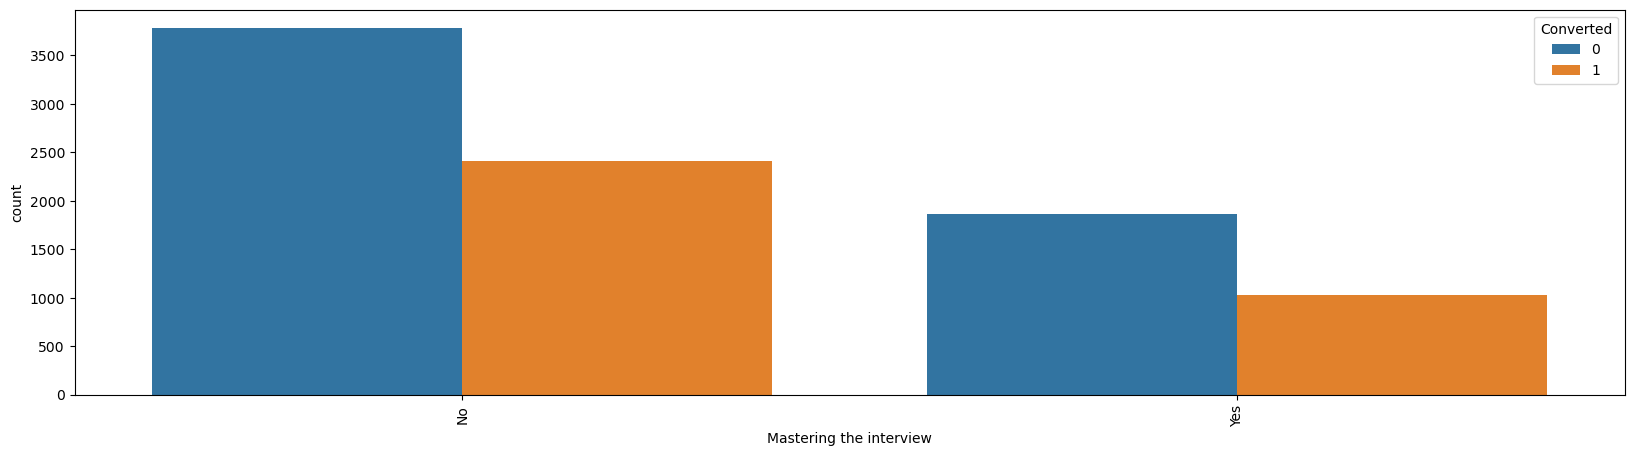

In [64]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='A free copy of Mastering The Interview', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('Mastering the interview')
plt.show()

##### Observation -
##### People are less interested for free copy of mastering interview and also less interested for conversion

### Plot for 'Last Notable Activity'

In [65]:
Lead_data['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

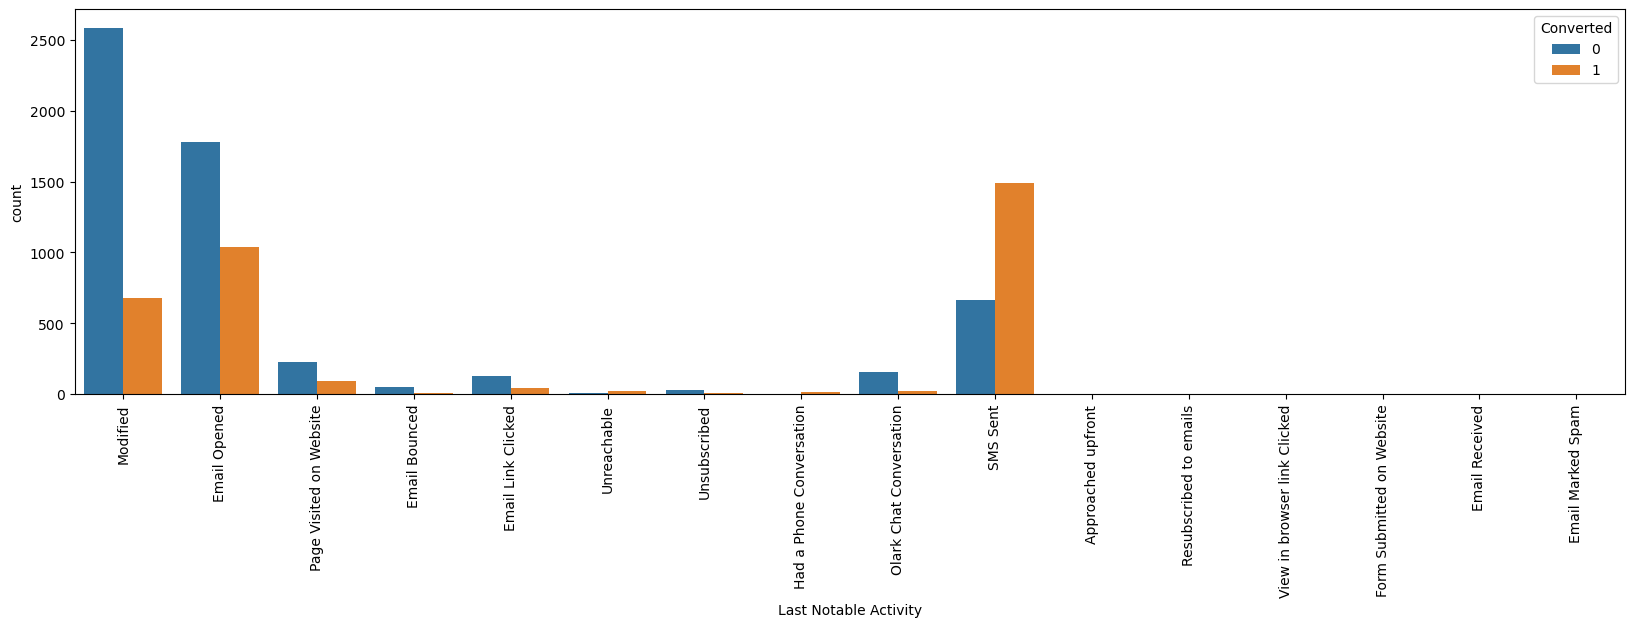

In [66]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='Last Notable Activity', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('Last Notable Activity')
plt.show()

##### Observation -
##### Last notable activity is highly converted via sms sent and need to concentrate more on email received, approach upfront, Resubscribed to emails, View in browser link Clicked etc for higher conversion rate

### Plot for 'Do not email' column

In [67]:
Lead_data['Do Not Email'].value_counts()

Do Not Email
No     8358
Yes     716
Name: count, dtype: int64

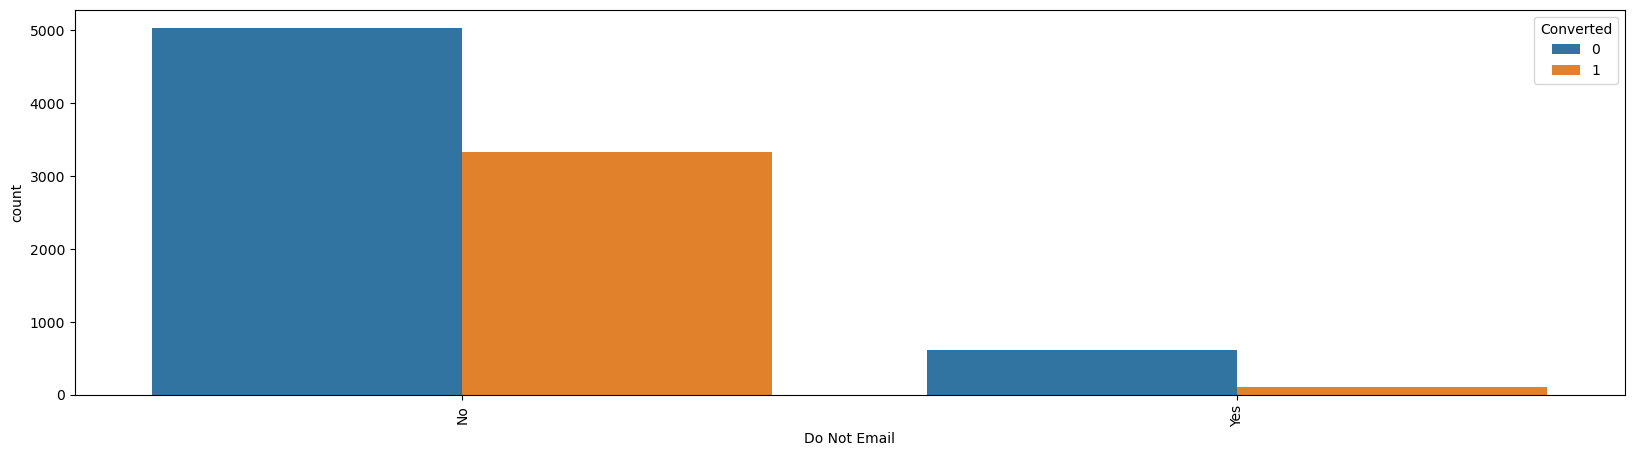

In [68]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='Do Not Email', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('Do Not Email')
plt.show()

##### Observation
##### People not like to receive email and not interested in conversion

### Plot for 'Do not call' column

In [69]:
Lead_data['Do Not Call'].value_counts()

Do Not Call
No     9072
Yes       2
Name: count, dtype: int64

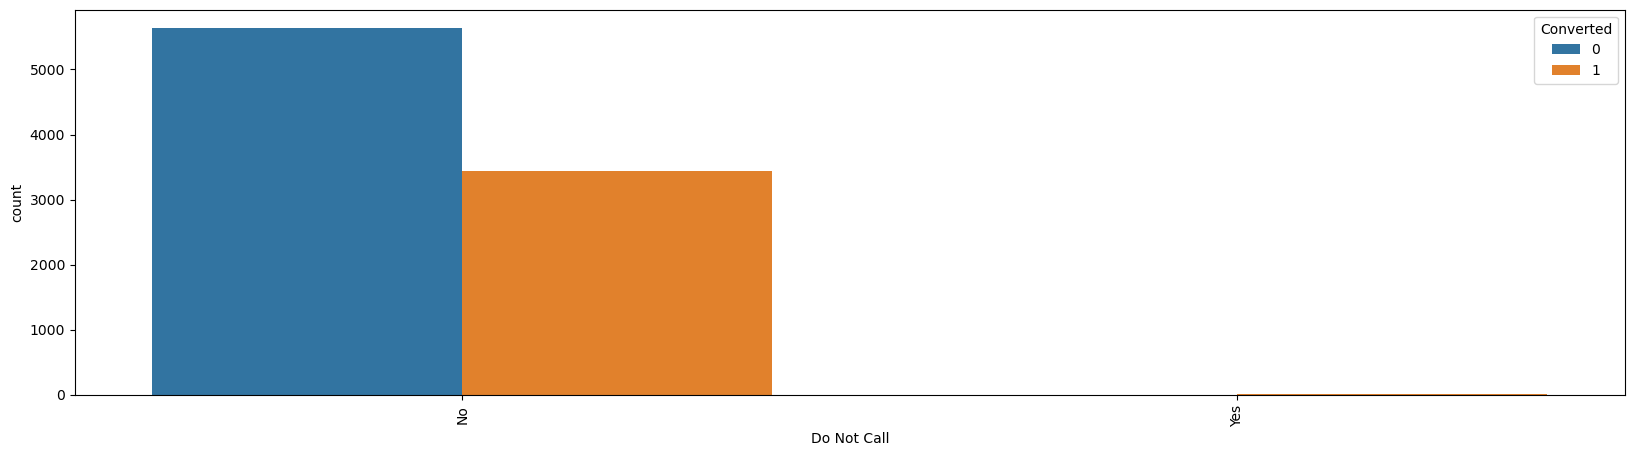

In [70]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='Do Not Call', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('Do Not Call')
plt.show()

##### Observation -
##### People are not interested for call regarding professional courses and not interested in conversion

### Plot for 'Lead Quality' column

In [71]:
Lead_data['Lead Quality'].value_counts()

Lead Quality
Unknown              4720
Might be             1519
Not Sure             1086
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: count, dtype: int64

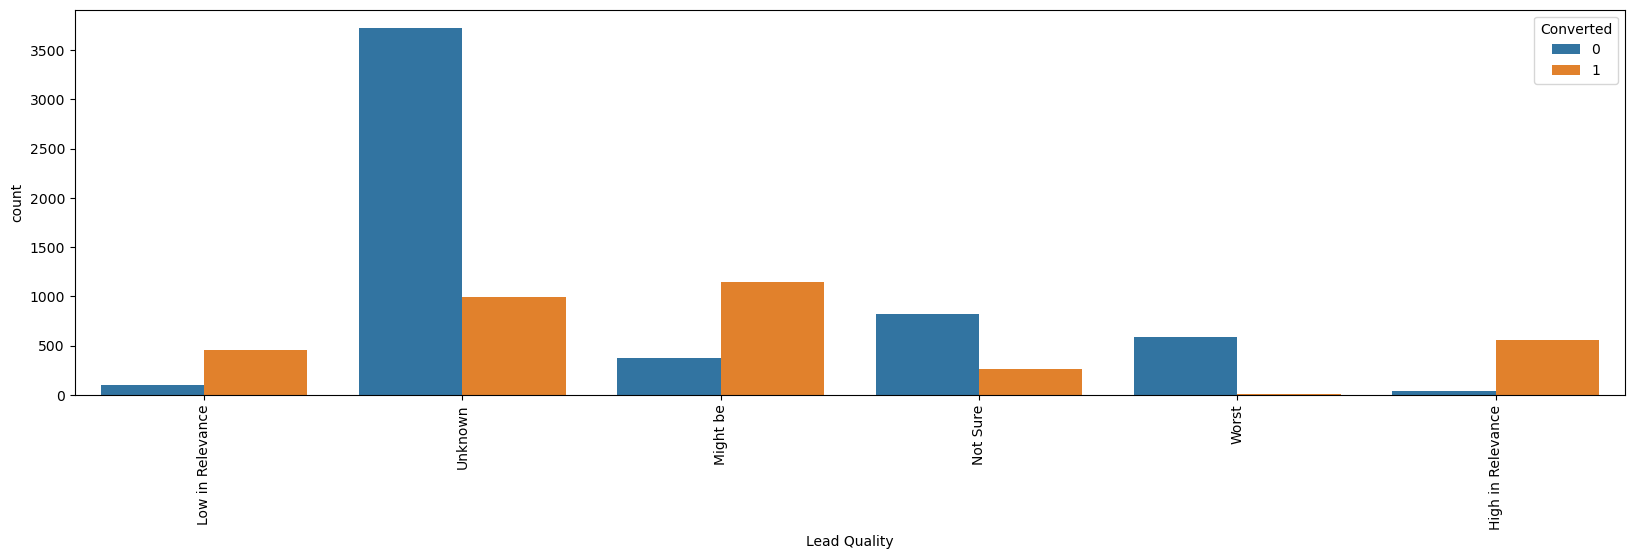

In [72]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='Lead Quality', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('Lead Quality')
plt.show()

##### Observation -
##### High in relevance,low in relevance and might be has high quality of leads compared to others

### Plot for 'Country' column

In [74]:
Lead_data['Country'].value_counts()

Country
India                   6491
Not Specified           2296
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

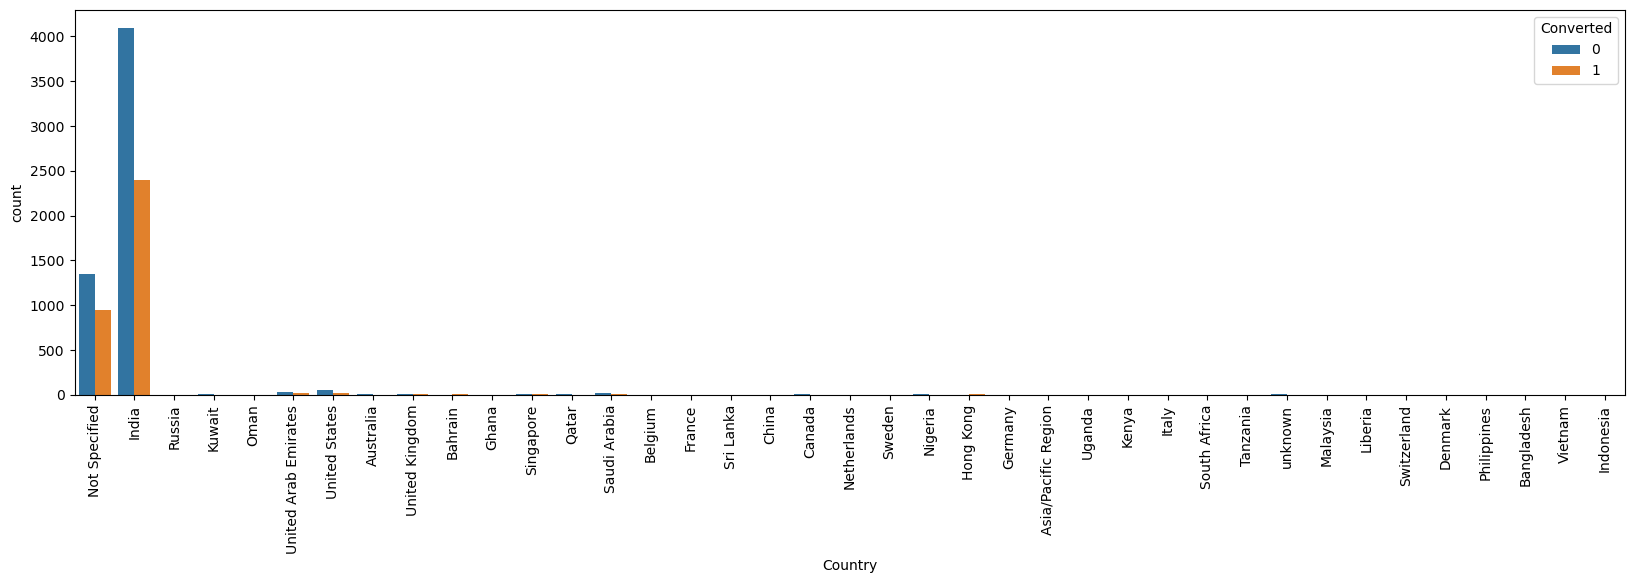

In [75]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='Country', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.show()

##### Observation -
##### Compared to others, India is the course purchasing and lead generating country

### Plot for 'City' column

In [76]:
Lead_data['City'].value_counts()

City
Not Specified                  3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: count, dtype: int64

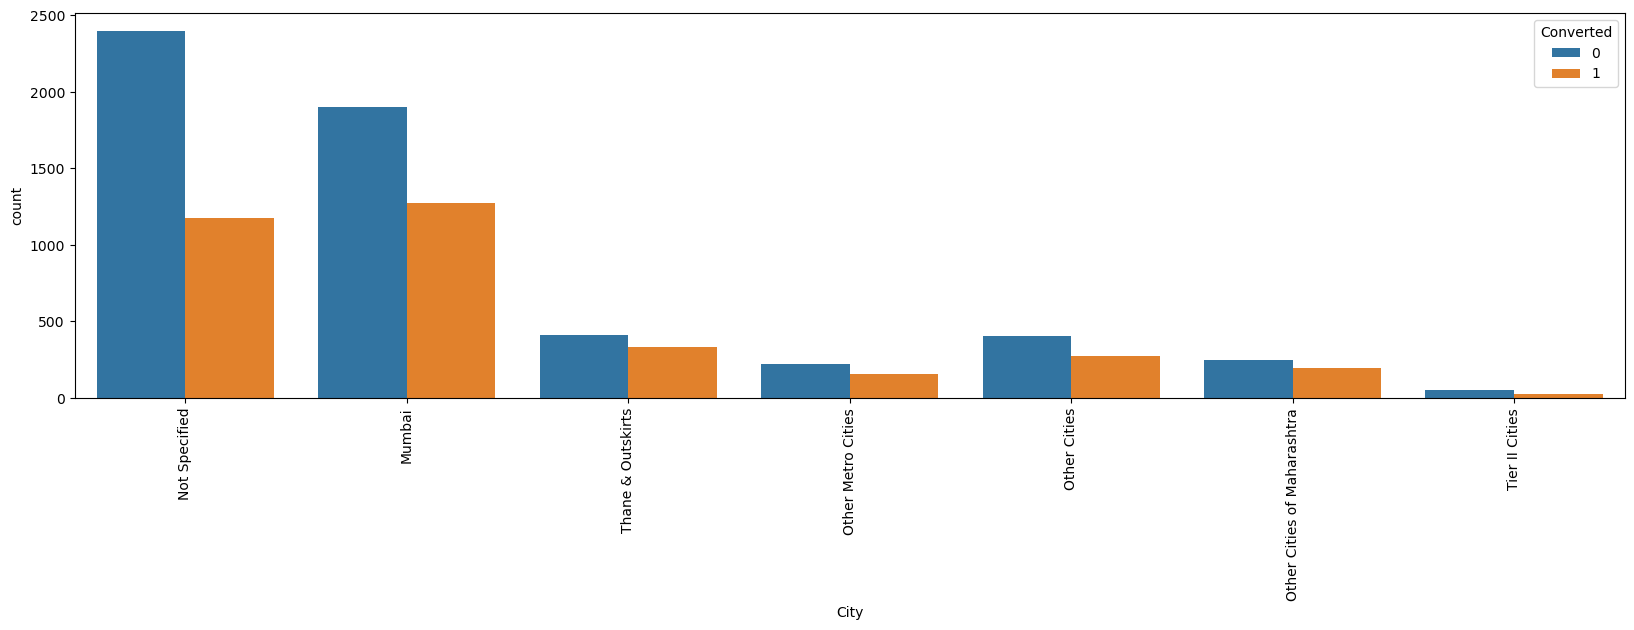

In [77]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='City', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('City')
plt.show()

##### Observation -
##### Most of the leads are from Mumbai city but company needs to concentrate more on tier 2 cities, other metro cities and cities apart from Mumbai for their conversion.

### Plot for 'Lead Profile' column

In [78]:
Lead_data['Lead Profile'].value_counts()

Lead Profile
Not Specified                  6757
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: count, dtype: int64

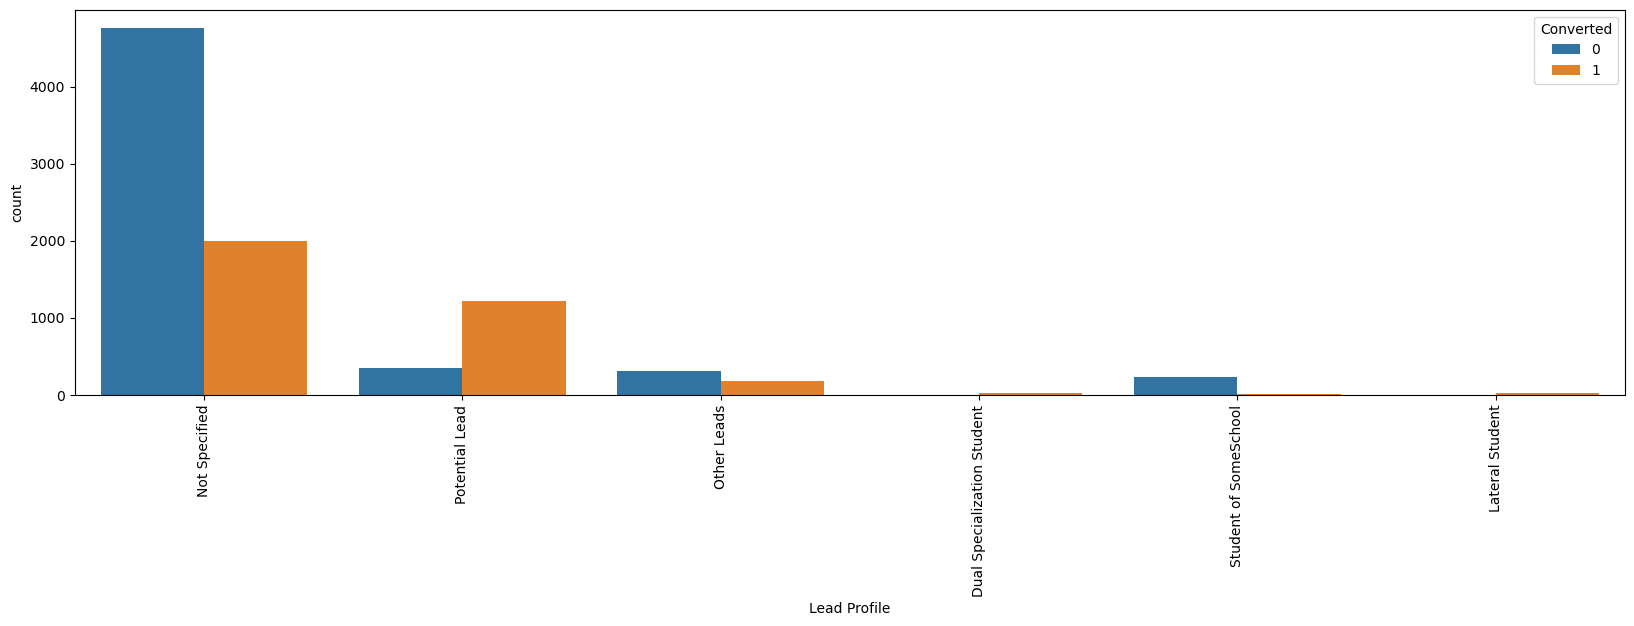

In [79]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='Lead Profile', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('Lead Profile')
plt.show()

##### Observation-
##### No of leads are mostly high for potential lead and they need to focus more on other leads, students of someschool, Lateral Student and Dual Specialization Student for their conversion

### Plot for 'Through Recommendations' column

In [80]:
Lead_data['Through Recommendations'].value_counts()

Through Recommendations
No     9067
Yes       7
Name: count, dtype: int64

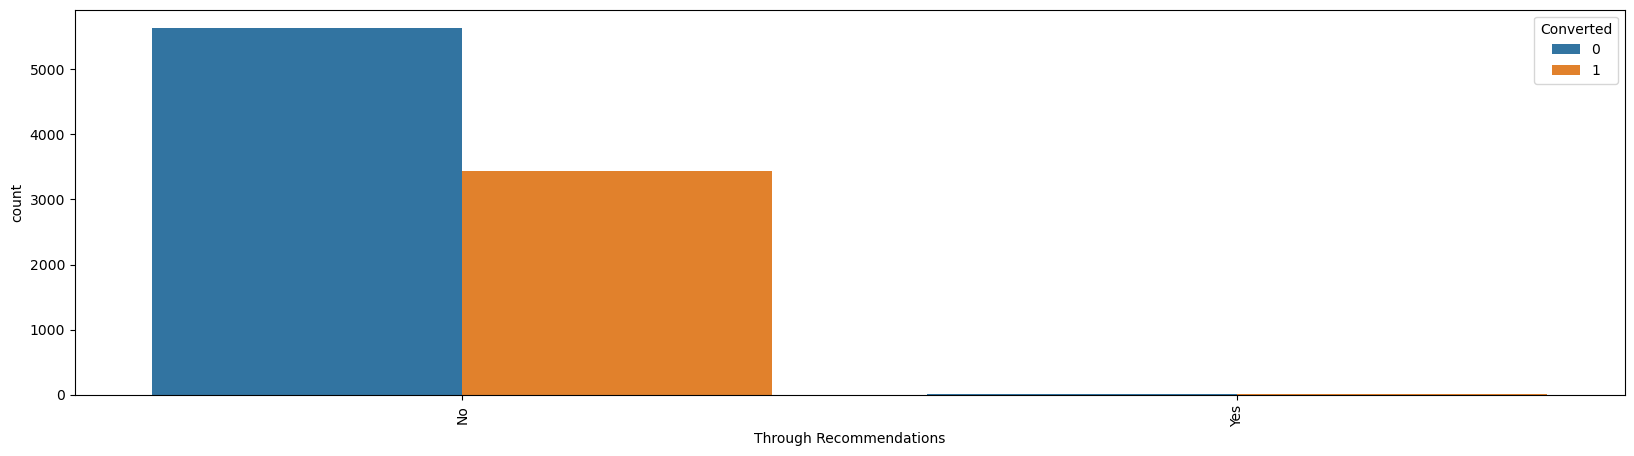

In [81]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='Through Recommendations', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('Through Recommendations')
plt.show()

##### Observation -
##### Customers got less recommendation and less interested to become lead

### Plot for 'Digital Advertisement' column

In [82]:
Lead_data['Digital Advertisement'].value_counts()

Digital Advertisement
No     9070
Yes       4
Name: count, dtype: int64

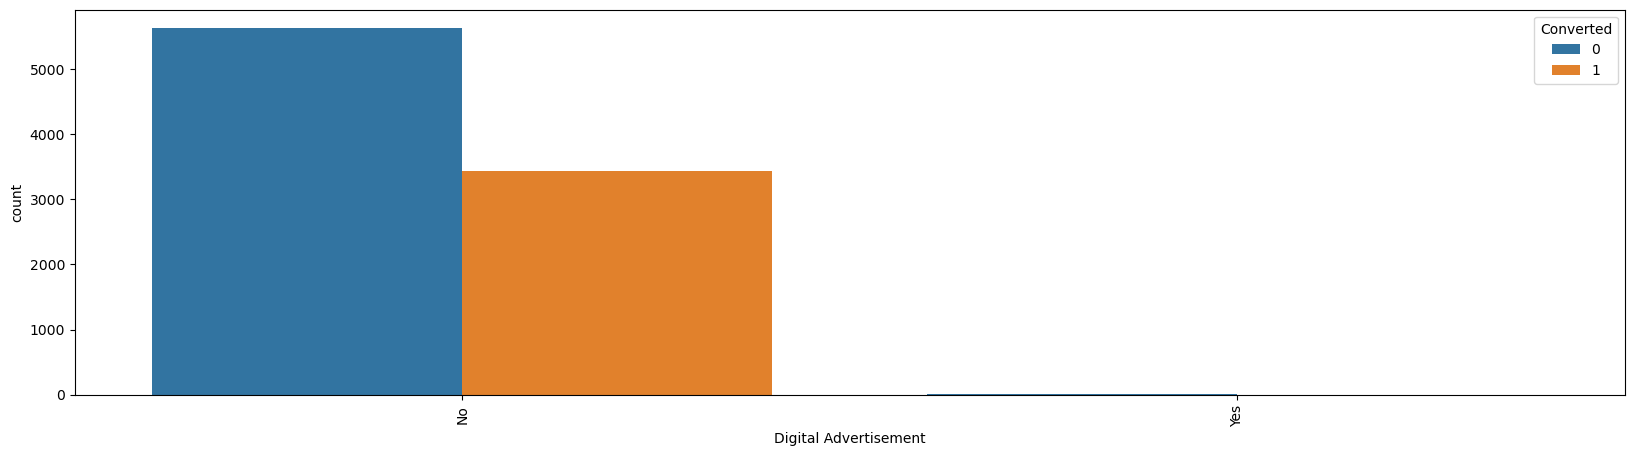

In [83]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='Digital Advertisement', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('Digital Advertisement')
plt.show()

##### Observation -
##### People were less involved with digital advertisement and less interested to convert themselves as lead

### Plot for 'Newspaper' column

In [84]:
Lead_data['Newspaper'].value_counts()

Newspaper
No     9073
Yes       1
Name: count, dtype: int64

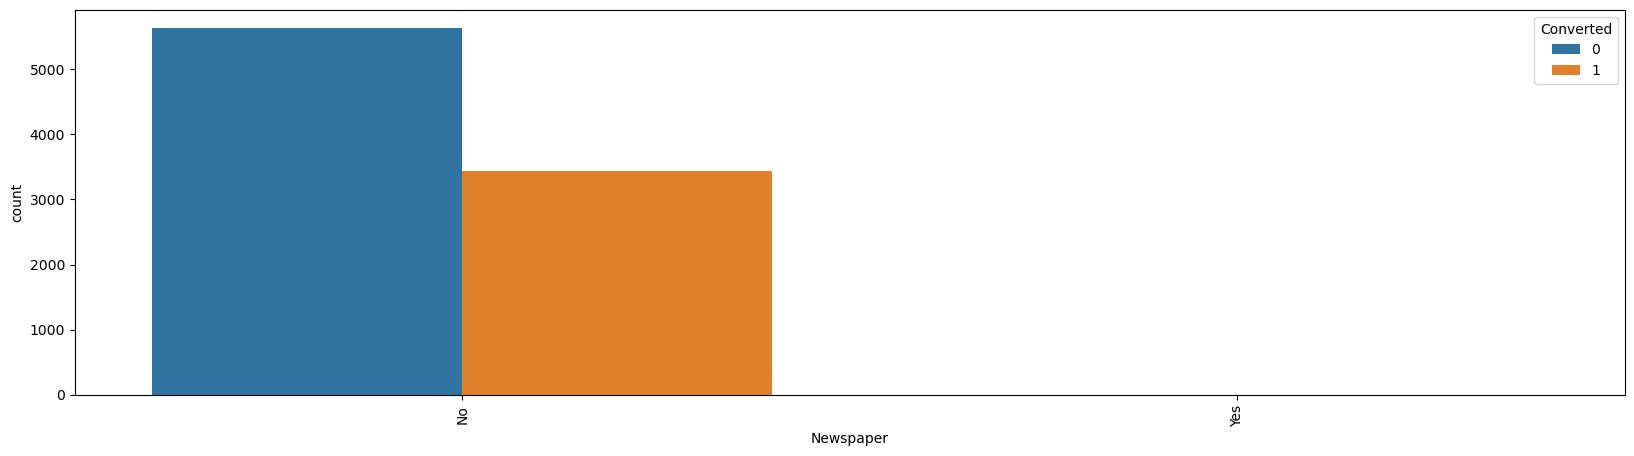

In [85]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='Newspaper', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('Newspaper')
plt.show()

##### Observation -
##### People has not seen any ad to newspaper and they are less likely to convert thenselves as lead.

### Plot for 'X Education Forums' column

In [86]:
Lead_data['X Education Forums'].value_counts()

X Education Forums
No     9073
Yes       1
Name: count, dtype: int64

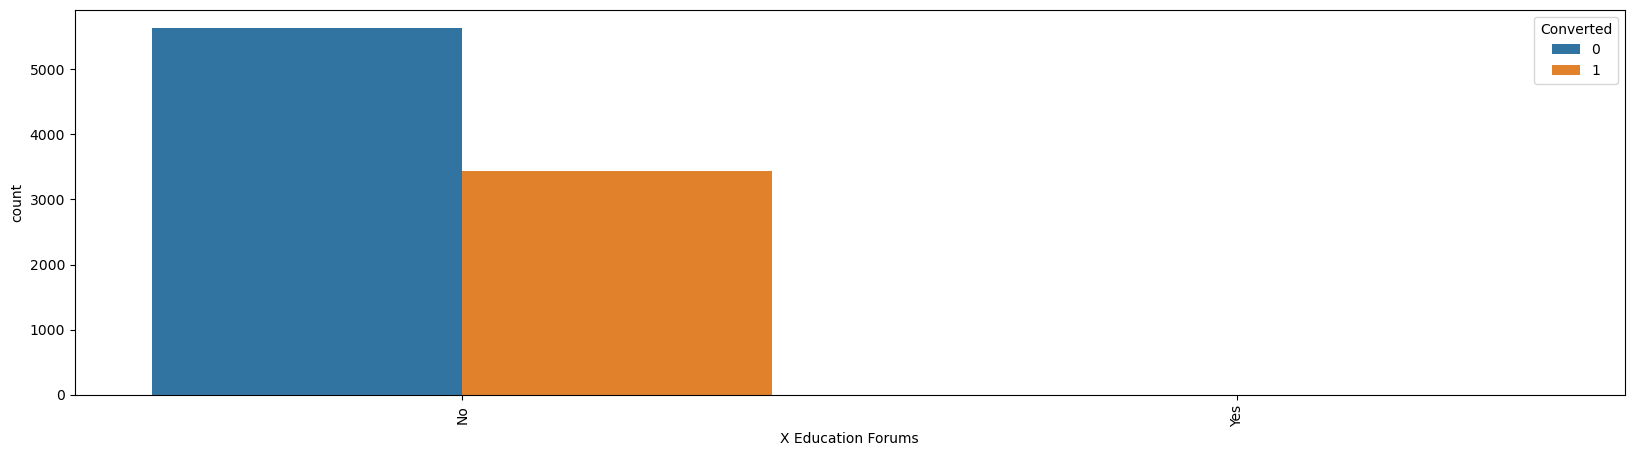

In [87]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='X Education Forums', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('X Education Forums')
plt.show()

##### Observation -
##### Customers has not seen any ad from education forum and they are less interest to become lead

### Plot for 'Newspaper Article' column

In [88]:
Lead_data['Newspaper Article'].value_counts()

Newspaper Article
No     9072
Yes       2
Name: count, dtype: int64

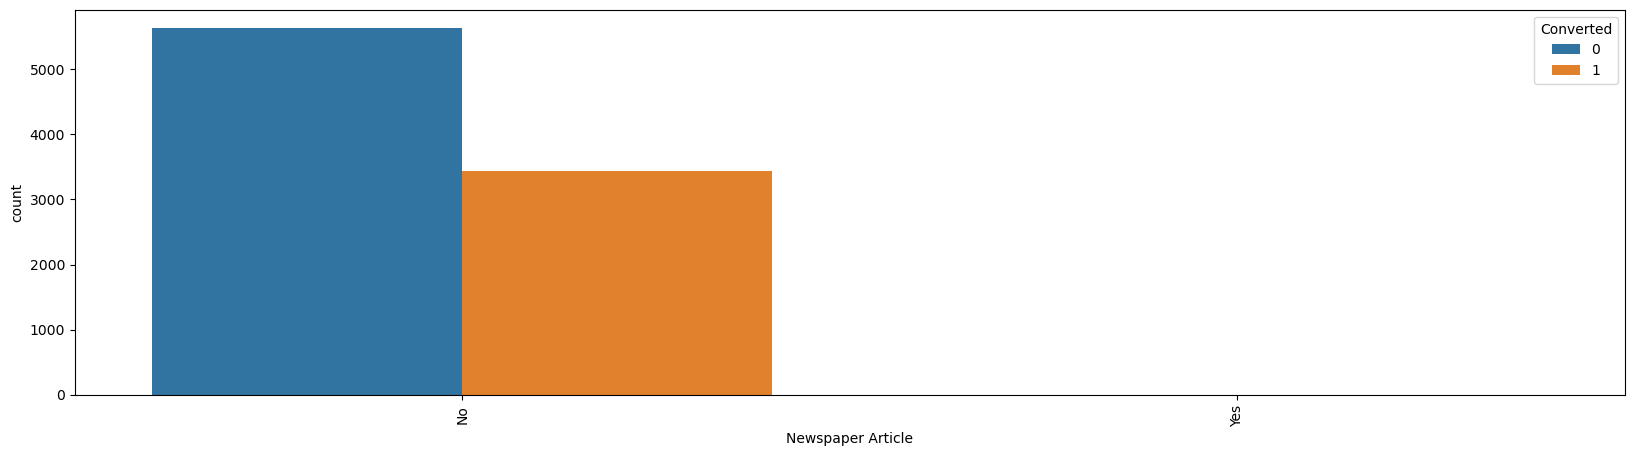

In [89]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='Newspaper Article', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('Newspaper Article')
plt.show()

##### Onservation -
##### Customers has not received any newspaper article and less interested in conversion

### Plot for 'Search' column

In [90]:
Lead_data['Search'].value_counts()

Search
No     9060
Yes      14
Name: count, dtype: int64

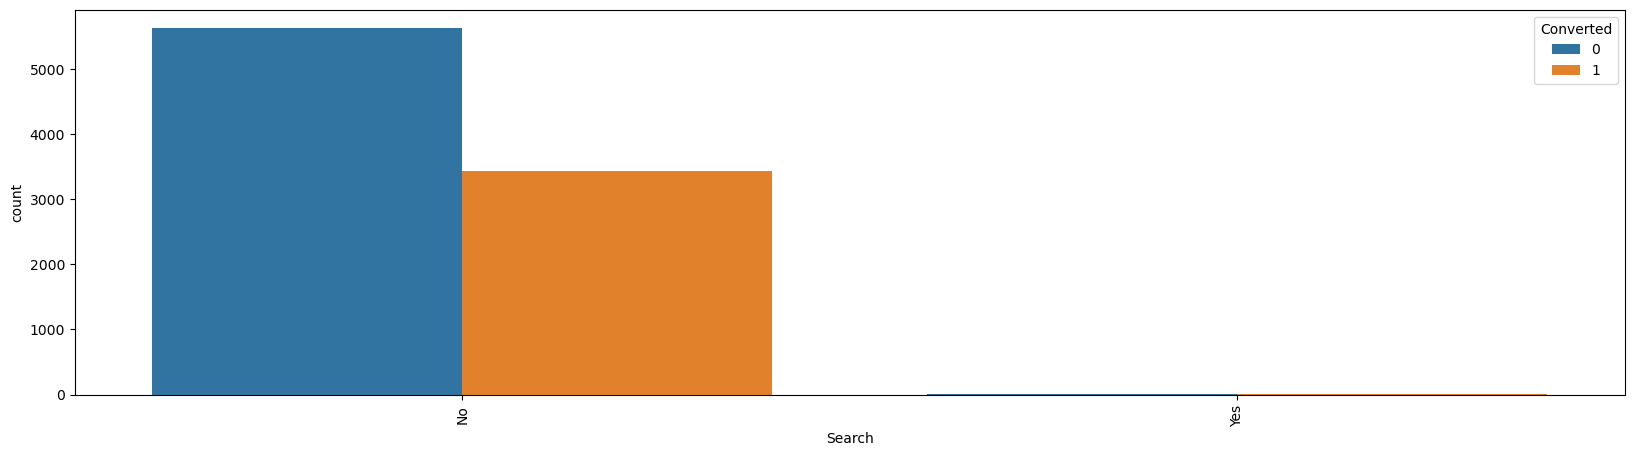

In [91]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='Search', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('Search')
plt.show()

##### Observation-
##### People has not serached for these courses and less interested to become leads.

### Plot for 'How did you hear about X Education' column

In [92]:
Lead_data['How did you hear about X Education'].value_counts()

How did you hear about X Education
Not Specified            7086
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: count, dtype: int64

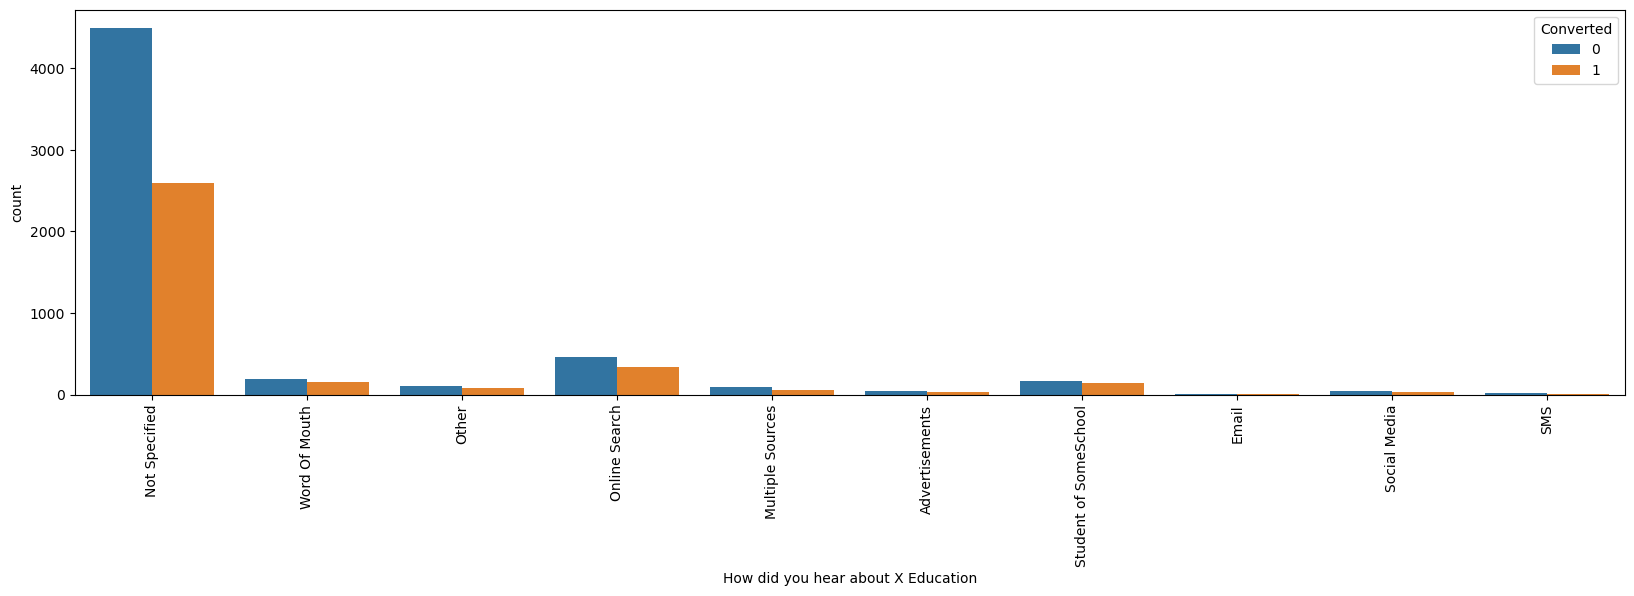

In [93]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='How did you hear about X Education', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('How did you hear about X Education')
plt.show()

##### Observation -
##### Most of the customers did online research and heard from others and company got less leads via sms, email or social media

### Plot for 'What matters most to you in choosing a course' column

In [94]:
Lead_data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6370
Not Specified                2702
Flexibility & Convenience       1
Other                           1
Name: count, dtype: int64

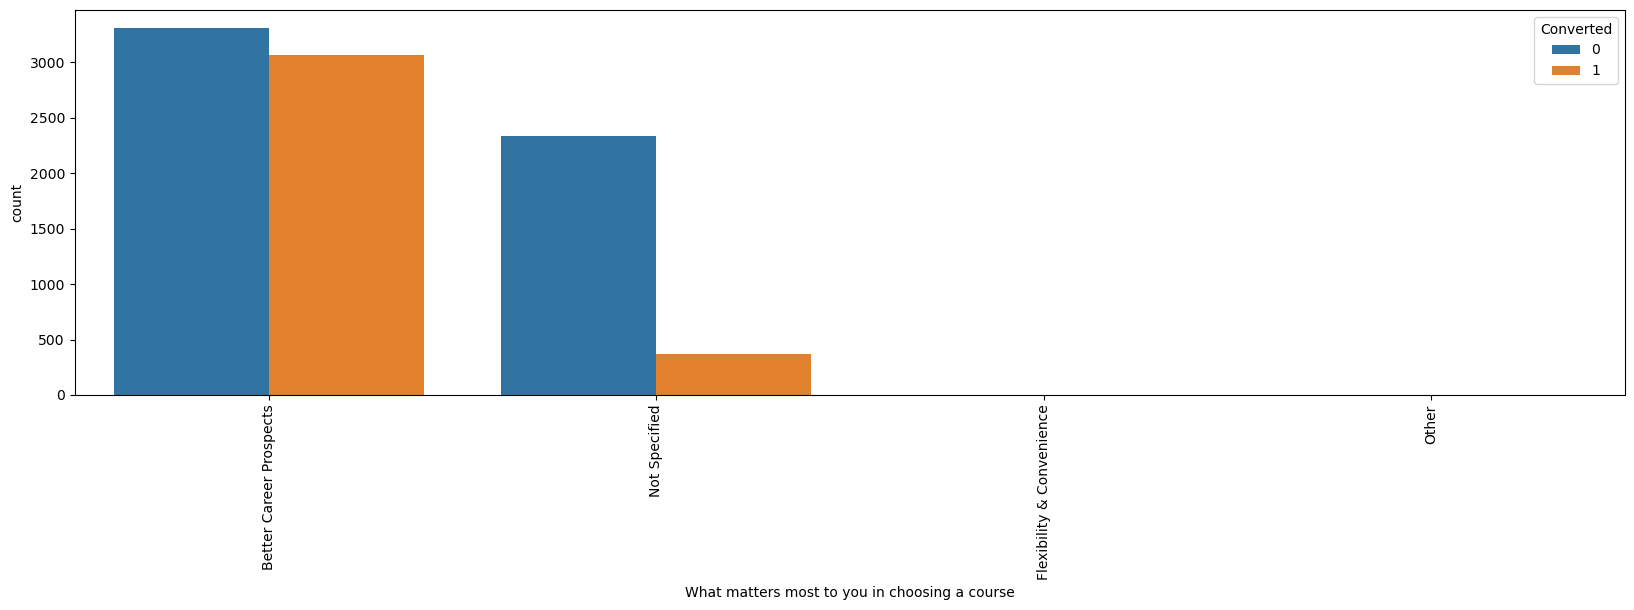

In [95]:
plt.figure(figsize=[20,5])
sns.countplot(data= Lead_data, x='What matters most to you in choosing a course', hue='Converted')
plt.xticks(rotation = 90)
plt.xlabel('What matters most to you in choosing a course')
plt.show()

##### Observation -
##### People are choosing courses for better career opportunities and company needs to focus more on flexibility and convinience and other candidates for more conversion rate.

In [96]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

# Data Transformation

### Outlier Treatment

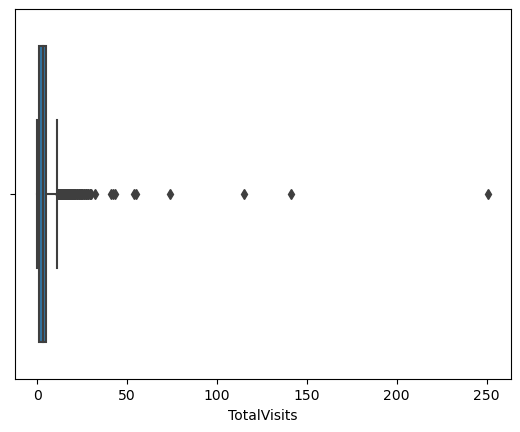

In [97]:
sns.boxplot(data=Lead_data, x='TotalVisits')
plt.show()

##### Observation -
##### There is outlier in the present variable and we have to remove them

In [98]:
plt.figure(figsize=[10,4])

Q3=Lead_data['TotalVisits'].quantile(0.99)
Lead_data=Lead_data[(Lead_data['TotalVisits'] <= Q3)]

Q1=Lead_data['TotalVisits'].quantile(0.01)
Lead_data=Lead_data[(Lead_data['TotalVisits'] >= Q1)]

<Figure size 1000x400 with 0 Axes>

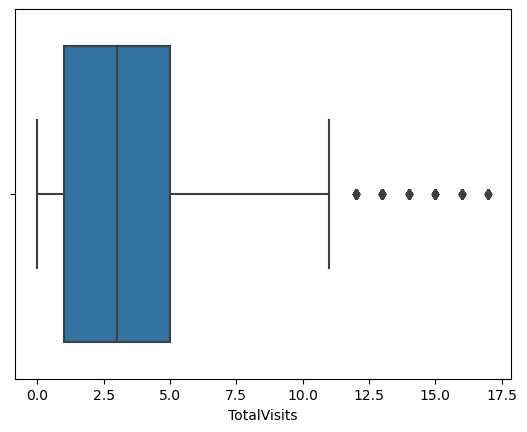

In [99]:
sns.boxplot(data=Lead_data, x='TotalVisits')
plt.show()

##### Observation -
##### Handled outlier with 95% of cap limit for 'TotalVisits'

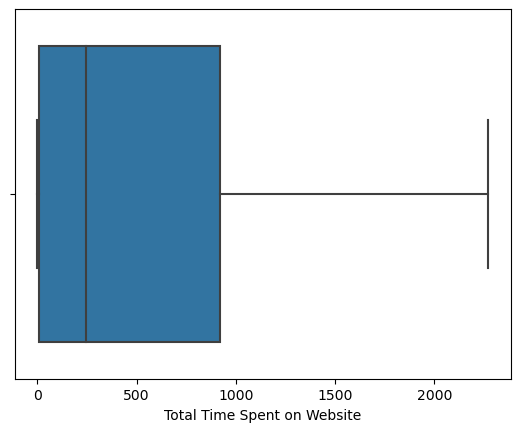

In [100]:
sns.boxplot(data=Lead_data, x='Total Time Spent on Website')
plt.show()

##### Observation -
##### There is no outlier for 'Total Time Spent on Website' variable. So no action required.

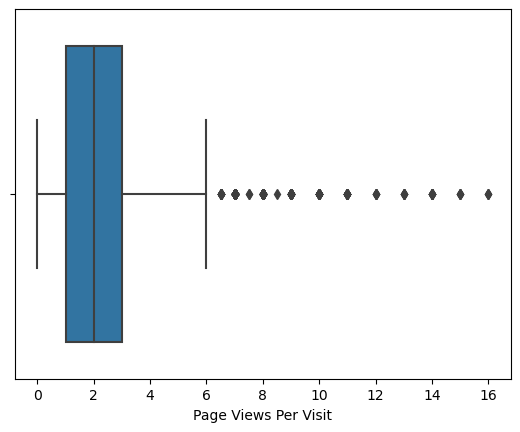

In [101]:
sns.boxplot(data=Lead_data, x='Page Views Per Visit')
plt.show()

##### Observation -
##### There is outlier for variable 'Page Views Per Visit'. Hence, we need to remove them

In [102]:
plt.figure(figsize=[10,4])

Q3=Lead_data['Page Views Per Visit'].quantile(0.99)
Lead_data=Lead_data[(Lead_data['Page Views Per Visit'] <= Q3)]

Q1=Lead_data['Page Views Per Visit'].quantile(0.01)
Lead_data=Lead_data[(Lead_data['Page Views Per Visit'] >= Q1)]

<Figure size 1000x400 with 0 Axes>

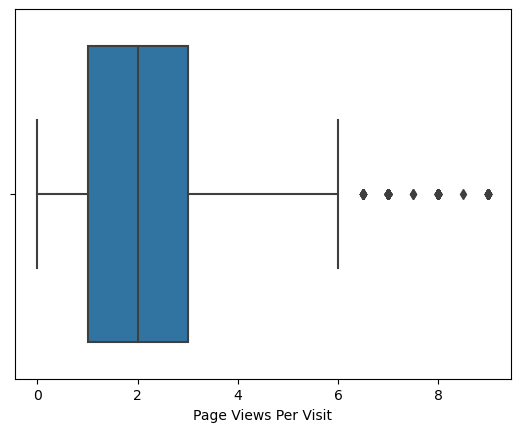

In [103]:
sns.boxplot(data=Lead_data, x='Page Views Per Visit')
plt.show()

##### Observation -
##### Handled outlier with 95% of cap limit for 'Page Views Per Visit'

In [105]:
Lead_data.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity        Country  ... X Education Forums Newspaper  \
0  Page Visited on Website  Not Specified  ...                 No        No   
1             Email Opened          India  ...                 No        No   
2             Email Opened          India  ...                 No        No   
3              Unreachable          India  ...                 No        No   
4        Converted to Lead          India  ...                 No        No   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   
3                    No                      No   
4                    No                      No   

                                  Tags      Lead Quality    Lead Profile  \
0          Interested in other courses  Low in Relevance   Not Specified   
1                              Ringing           Unknown   Not Specified   
2  Will revert after reading the email          Might be  Potential Lead   
3                              Ringing          Not Sure   Not Specified   
4  Will revert after reading the email          Might be   Not Specified   

            City A free copy of Mastering The Interview Last Notable Activity  
0  Not Specified                                     No              Modified  
1  Not Specified                                     No          Email Opened  
2         Mumbai                                    Yes          Email Opened  
3         Mumbai                                     No              Modified  
4         Mumbai                                     No              Modified  

[5 rows x 26 columns]

In [106]:
Lead_data.shape

(8924, 26)

### Dummy Variable Creation

In [107]:
Lead_data['A free copy of Mastering The Interview']=Lead_data['A free copy of Mastering The Interview'].map({'No':0,'Yes':1})
Lead_data['Do Not Email']=Lead_data['Do Not Email'].map({'No':0,'Yes':1})
Lead_data['Do Not Call']=Lead_data['Do Not Call'].map({'No':0,'Yes':1})
Lead_data['X Education Forums']=Lead_data['X Education Forums'].map({'No':0,'Yes':1})
Lead_data['Newspaper']=Lead_data['Newspaper'].map({'No':0,'Yes':1})
Lead_data['Digital Advertisement']=Lead_data['Digital Advertisement'].map({'No':0,'Yes':1})
Lead_data['Through Recommendations']=Lead_data['Through Recommendations'].map({'No':0,'Yes':1})

In [108]:
Lead_data.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity        Country  ... X Education Forums Newspaper  \
0  Page Visited on Website  Not Specified  ...                  0         0   
1             Email Opened          India  ...                  0         0   
2             Email Opened          India  ...                  0         0   
3              Unreachable          India  ...                  0         0   
4        Converted to Lead          India  ...                  0         0   

  Digital Advertisement Through Recommendations  \
0                     0                       0   
1                     0                       0   
2                     0                       0   
3                     0                       0   
4                     0                       0   

                                  Tags      Lead Quality    Lead Profile  \
0          Interested in other courses  Low in Relevance   Not Specified   
1                              Ringing           Unknown   Not Specified   
2  Will revert after reading the email          Might be  Potential Lead   
3                              Ringing          Not Sure   Not Specified   
4  Will revert after reading the email          Might be   Not Specified   

            City  A free copy of Mastering The Interview  \
0  Not Specified                                       0   
1  Not Specified                                       0   
2         Mumbai                                       1   
3         Mumbai                                       0   
4         Mumbai                                       0   

   Last Notable Activity  
0               Modified  
1           Email Opened  
2           Email Opened  
3               Modified  
4               Modified  

[5 rows x 26 columns]

In [109]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8924 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8924 non-null   object 
 1   Lead Source                                    8924 non-null   object 
 2   Do Not Email                                   8924 non-null   int64  
 3   Do Not Call                                    8924 non-null   int64  
 4   Converted                                      8924 non-null   int64  
 5   TotalVisits                                    8924 non-null   float64
 6   Total Time Spent on Website                    8924 non-null   int64  
 7   Page Views Per Visit                           8924 non-null   float64
 8   Last Activity                                  8924 non-null   object 
 9   Country                                        8924 non-n

In [110]:
round((Lead_data.isnull().sum()*100/len(Lead_data.index)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

##### Observation
##### There is no null or missing value after cleaning data

In [111]:
dummy = pd.get_dummies(Lead_data[['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Country',
                                  'Specialization','How did you hear about X Education','What is your current occupation',
                                  'What matters most to you in choosing a course','Search','Newspaper Article',
                                  'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Tags',
                                  'Lead Quality','Lead Profile','City','A free copy of Mastering The Interview',
                                  'Last Notable Activity']], drop_first=True)

In [112]:
Lead_data = pd.concat([Lead_data, dummy], axis=1)

### Created dummies for the above variable, so we can drop original one

In [113]:
Lead_data = Lead_data.drop(['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Country',
                                  'Specialization','How did you hear about X Education','What is your current occupation',
                                  'What matters most to you in choosing a course','Search','Newspaper Article',
                                  'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Tags',
                                  'Lead Quality','Lead Profile','City','A free copy of Mastering The Interview',
                                  'Last Notable Activity'], axis=1)

In [114]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8924 entries, 0 to 9239
Columns: 175 entries, Converted to Last Notable Activity_View in browser link Clicked
dtypes: bool(171), float64(2), int64(2)
memory usage: 1.8 MB


In [115]:
Lead_data.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                False                      False   
1                                False                      False   
2                                 True                      False   
3                                 True                      False   
4                                 True                      False   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                    False                       False                 False   
1                    False                       False                 False   
2                    False                        True                 False   
3                    False                        True                 False   
4                    False                       False                 False   

   Lead Source_Google  ...  Last Notable Activity_Form Submitted on Website  \
0               False  ...                                            False   
1               False  ...                                            False   
2               False  ...                                            False   
3               False  ...                                            False   
4                True  ...                                            False   

   Last Notable Activity_Had a Phone Conversation  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   Last Notable Activity_Modified  \
0                            True   
1                           False   
2                           False   
3                            True   
4                            True   

   Last Notable Activity_Olark Chat Conversation  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Page Visited on Website  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Resubscribed to emails  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                           False                              False   
1                           False                              False   
2                           False                              False   
3                           False                              False   
4                           False                              False   

   Last Notable Activity_Unsubscribed  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False 

### Converted all numerical and categorical variables int type

In [116]:
Lead_data['TotalVisits'] = pd.to_numeric(Lead_data['TotalVisits'], errors='coerce')
Lead_data['Page Views Per Visit'] = pd.to_numeric(Lead_data['Page Views Per Visit'], errors='coerce')

In [117]:
bool_columns = Lead_data.select_dtypes(include=['bool']).columns

In [118]:
Lead_data[bool_columns] = Lead_data[bool_columns].astype(int)

In [119]:
Lead_data.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  ...  Last Notable Activity_Form Submitted on Website  \
0                   0  ...                                                0   
1                   0  ...                                                0   
2                   0  ...                                                0   
3                   0  ...                                                0   
4                   1  ...                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0 

### Rechecking missig values

In [120]:
(Lead_data.isnull().sum()/len(Lead_data.index))*100

Converted                                             0.0
TotalVisits                                           0.0
Total Time Spent on Website                           0.0
Page Views Per Visit                                  0.0
Lead Origin_Landing Page Submission                   0.0
                                                     ... 
Last Notable Activity_Resubscribed to emails          0.0
Last Notable Activity_SMS Sent                        0.0
Last Notable Activity_Unreachable                     0.0
Last Notable Activity_Unsubscribed                    0.0
Last Notable Activity_View in browser link Clicked    0.0
Length: 175, dtype: float64

### Drop null values for numerival column after dummy creation

In [121]:
Lead_data = Lead_data[~np.isnan(Lead_data["TotalVisits"])]
Lead_data = Lead_data[~np.isnan(Lead_data["Page Views Per Visit"])]

### Train Test Split

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
## Putting feature variables to x
X=Lead_data.drop(['Converted'], axis=1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  ...  \
0                   0                      0  ...   
1                   0                      0  ...   
2                   0                      0  ...   
3                   0                      0  ...   
4                   1                      0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                

In [124]:
## Putting response variable to y
y=Lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [125]:
##Splitting the data into train and test dataset.
X_train, X_test, y_train, y_test = train_test_split (X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature scaling

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
6676    -0.049636                     1.395668              0.395289   
6138     0.297929                     0.609686              0.926758   
8650    -0.049636                     1.178657              0.395289   
3423    -1.092332                    -0.878390             -1.199117   
6552    -1.092332                    -0.878390             -1.199117   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
6676                                    1                          0   
6138                                    1                          0   
8650                                    1                          0   
3423                                    0                          0   
6552                                    0                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
6676                        0                           1   
6138                        0                           0   
8650                        0                           1   
3423                        0                           0   
6552                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
6676                     0                   0                      0  ...   
6138                     0                   1                      0  ...   
8650                     0                   0                      0  ...   
3423                     0                   0                      0  ...   
6552                     0                   0                      0  ...   

      Last Notable Activity_Form Submitted on Website  \
6676                                                0   
6138                                                0   
8650                                                0   
3423                                                0   
6552                                                0   

      Last Notable Activity_Had a Phone Conversation  \
6676                                               0   
6138                                               0   
8650                                               0   
3423                                               0   
6552                                               0   

      Last Notable Activity_Modified  \
6676                               0   
6138                               0   
8650                               0   
3423                               1   
6552                               0   

      Last Notable Activity_Olark Chat Conversation  \
6676                                              0   
6138                                              0   
8650                                              0   
3423                                              0   
6552                                              0   

      Last Notable Activity_Page Visited on Website  \
6676                                              0   
6138                                              0   
8650                                              0   
3423                                              0   
6552                                              0   

      Last Notable Activity_Resubscribed to emails  \
6676                                             0   
6138                                             0   
8650                                             0   
3423                                             0   
6552                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
6676                               0                                  0   
6138                               1                                  0   
8650                               0                                  0   
3423                               0                                  0   
6552                 

In [128]:
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
7625          2.0                         1621                   2.0   
5207          4.0                          887                   4.0   
2390          0.0                            0                   0.0   
4362          2.0                          232                   2.0   
1023         15.0                          317                   5.0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
7625                                    1                          0   
5207                                    1                          0   
2390                                    0                          1   
4362                                    1                          0   
1023                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
7625                        0                           1   
5207                        0                           1   
2390                        0                           0   
4362                        0                           0   
1023                        0                           1   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
7625                     0                   0                      0  ...   
5207                     0                   0                      0  ...   
2390                     0                   0                      1  ...   
4362                     0                   1                      0  ...   
1023                     0                   0                      0  ...   

      Last Notable Activity_Form Submitted on Website  \
7625                                                0   
5207                                                0   
2390                                                0   
4362                                                0   
1023                                                0   

      Last Notable Activity_Had a Phone Conversation  \
7625                                               0   
5207                                               0   
2390                                               0   
4362                                               0   
1023                                               0   

      Last Notable Activity_Modified  \
7625                               0   
5207                               0   
2390                               0   
4362                               0   
1023                               0   

      Last Notable Activity_Olark Chat Conversation  \
7625                                              0   
5207                                              0   
2390                                              0   
4362                                              0   
1023                                              0   

      Last Notable Activity_Page Visited on Website  \
7625                                              0   
5207                                              0   
2390                                              0   
4362                                              0   
1023                                              0   

      Last Notable Activity_Resubscribed to emails  \
7625                                             0   
5207                                             0   
2390                                             0   
4362                                             0   
1023                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
7625                               0                                  0   
5207                               0                                  0   
2390                               1                                  0   
4362                               1                                  0   
1023                 

In [129]:
y_train.head()

6676    1
6138    1
8650    1
3423    0
6552    0
Name: Converted, dtype: int64

In [130]:
y_test.head()

7625    0
5207    1
2390    1
4362    0
1023    0
Name: Converted, dtype: int64

In [131]:
X_train.shape

(6246, 174)

In [132]:
X_test.shape

(2678, 174)

In [133]:
y_train.shape

(6246,)

In [134]:
y_test.shape

(2678,)

### Checking for conversion rate

In [135]:
Converted = (sum(Lead_data['Converted'])/len(Lead_data['Converted'].index))*100
Converted

37.75212909009413

### Looking for correlation

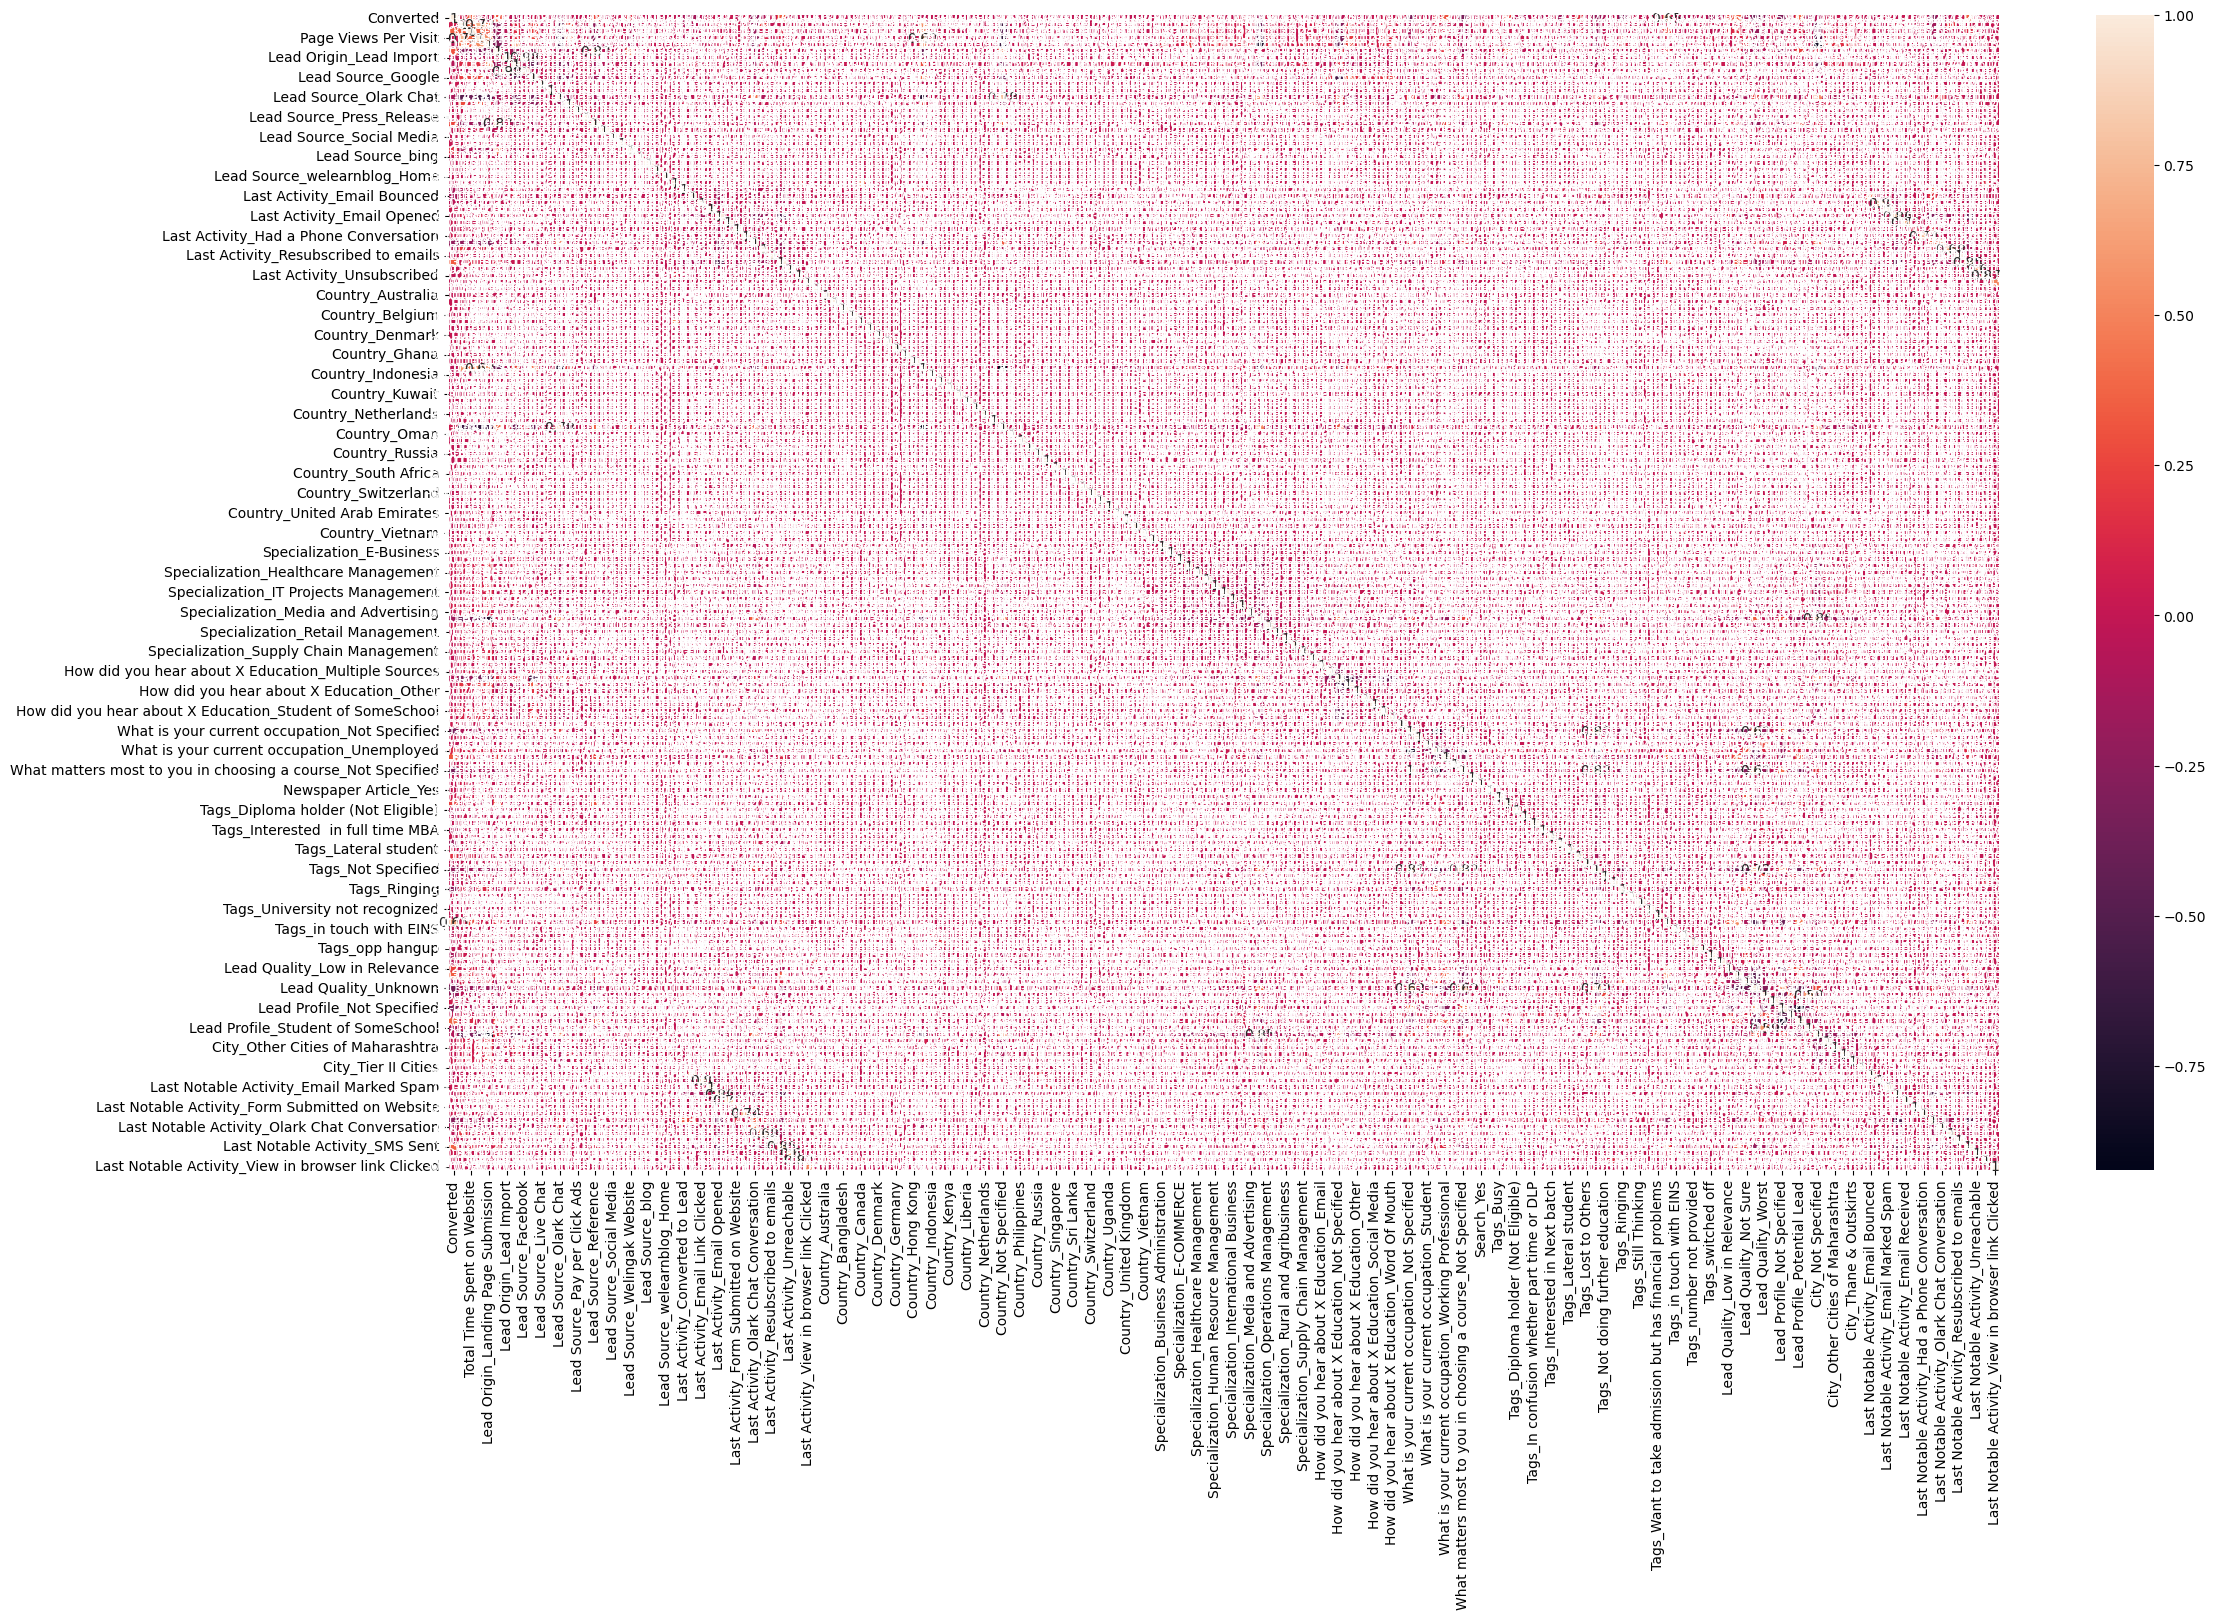

In [136]:
plt.figure(figsize=[25,15])
sns.heatmap(Lead_data.corr(), annot=True)
plt.show()

##### Observation
##### There is lots of variable present in this heatmap, need to drop insignificant features. its very hard to come to any conclusing from this graph.

# Model Building

In [137]:
### Running our train model
import statsmodels.api as sm

In [138]:
### Logistic Regression Model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6083
Model Family:                Binomial   Df Model:                          162
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 22 Jul 2024   Deviance:                       44946.
Time:                        23:08:34   Pearson chi2:                 2.20e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    4.761e+15      1e+08   4.75e+07      0.000    4.76e+15    4.76e+15
TotalVisits                                                              8.337e+13   1.36e+06   6.11e+07      0.000    8.34e+13    8.34e+13
Total Time Spent on Website                                              1.487e+14   1.06e+06    1.4e+08      0.000    1.49e+14    1.49e+14
Page Views Per Visit                                                    -1.188e+14   1.47e+06  -8.06e+07      0.000   -1.19e+14   -1.19e+14
Lead Origin_Landing Page Submission                                     -1.068e+14   4.23e+06  -2.53e+07      0.000   -1.07e+14   -1.07e+14
Lead Origin_Lead Add Form                                               -1.358e+15   3.94e+07  -3.45e+07      0.000   -1.36e+15   -1.36e+15
Lead Origin_Lead Import                                                  5.654e+15   7.28e+07   7.77e+07      0.000    5.65e+15    5.65e+15
Lead Source_Direct Traffic                                              -7.723e+14   5.28e+07  -1.46e+07      0.000   -7.72e+14   -7.72e+14
Lead Source_Facebook                                                    -6.504e+15   8.84e+07  -7.36e+07      0.000    -6.5e+15    -6.5e+15
Lead Source_Google                                                      -7.886e+14   5.27e+07   -1.5e+07      0.000   -7.89e+14   -7.89e+14
Lead Source_Live Chat                                                    2.472e+15   7.58e+07   3.26e+07      0.000    2.47e+15    2.47e+15
Lead Source_NC_EDM                                                        -58.5906   1.88e-06  -3.11e+07      0.000     -58.591     -58.591
Lead Source_Olark Chat                                                  -7.038e+14   5.27e+07  -1.34e+07      0.000   -7.04e+14   -7.04e+14
Lead Source_Organic Search                                              -7.898e+14   5.27e+07   -1.5e+07      0.000    -7.9e+14    -7.9e+14
Lead Source_Pay per Click Ads                                           -4.818e+15   8.56e+07  -5.63e+07      0.000   -4.82e+15   -4.82e+15
Lead Source_Press_Release                                               -3.398e+15   8.59e+07  -3.95e+07      0.000    -3.4e+15    -3.4e+15
Lead Source_Reference                                                    1.882e+14   3.51e+07   5.36e+06      0.000    1.88e+14    1.88e+14
Lead Source_Referral Sites                                              -9.235e+14   5.32e+07  -1.74e+07      0.000   -9.23e+14   -9.23e+14
Lead Source_Social Media                                                  -89.3282    1.8e-06  -4.96e+07      0.000     -89.328     -89.328
Lea

### Featuring Selection using RFE

In [139]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [140]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [141]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False, False, False, False, False, False, False,
        True, False,

In [142]:
list(zip(X_train, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 53),
 ('Total Time Spent on Website', False, 8),
 ('Page Views Per Visit', False, 52),
 ('Lead Origin_Landing Page Submission', False, 41),
 ('Lead Origin_Lead Add Form', False, 35),
 ('Lead Origin_Lead Import', False, 57),
 ('Lead Source_Direct Traffic', False, 100),
 ('Lead Source_Facebook', False, 9),
 ('Lead Source_Google', False, 122),
 ('Lead Source_Live Chat', False, 141),
 ('Lead Source_NC_EDM', False, 157),
 ('Lead Source_Olark Chat', False, 94),
 ('Lead Source_Organic Search', False, 102),
 ('Lead Source_Pay per Click Ads', False, 143),
 ('Lead Source_Press_Release', False, 150),
 ('Lead Source_Reference', False, 66),
 ('Lead Source_Referral Sites', False, 59),
 ('Lead Source_Social Media', False, 153),
 ('Lead Source_WeLearn', False, 134),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 117),
 ('Lead Source_blog', False, 91),
 ('Lead Source_testone', False, 135),
 ('Lead Source_welearnblog_Home', False, 92),
 ('Lead Source_you

In [143]:
col = X_train.columns[rfe.support_]

In [144]:
X_train.columns[rfe.support_]

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What matters most to you in choosing a course_Not Specified',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### Accessing the model with statsmodel

### Using features selected by RFE

In [145]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1230.4
Date:                Mon, 22 Jul 2024   Deviance:                       2460.9
Time:                        23:08:57   Pearson chi2:                 1.12e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6072
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -2.7528      0.204    -13.493      0.000      -3.153      -2.353
Lead Source_Welingak Website                                    2.2739      0.750      3.031      0.002       0.803       3.744
Last Activity_SMS Sent                                          2.1949      0.122     18.032      0.000       1.956       2.433
What matters most to you in choosing a course_Not Specified    -2.5362      0.146    -17.403      0.000      -2.822      -2.251
Tags_Busy                                                       2.1951      0.290      7.569      0.000       1.627       2.764
Tags_Closed by Horizzon                                         8.3190      0.743     11.191      0.000       6.862       9.776
Tags_Lost to EINS                                               8.6327      0.581     14.864      0.000       7.494       9.771
Tags_Not Specified                                              3.2379      0.230     14.059      0.000       2.786       3.689
Tags_Ringing                                                   -2.0553      0.306     -6.710      0.000      -2.656      -1.455
Tags_Will revert after reading the email                        6.0742      0.257     23.616      0.000       5.570       6.578
Tags_invalid number                                            -2.1213      1.047     -2.026      0.043      -4.173      -0.070
Tags_switched off                                              -2.8599      0.747     -3.828      0.000      -4.324      -1.396
Tags_wrong number given                                       -21.7767   1.19e+04     -0.002      0.999   -2.34e+04    2.34e+04
Lead Quality_Worst                                             -2.0644      0.644     -3.206      0.001      -3.326      -0.803
Last Notable Activity_Modified                                 -1.5568      0.126    -12.363      0.000      -1.804      -1.310
Last Notable Activity_Olark Chat Conversation                  -1.5841      0.416     -3.808      0.000      -2.399      -0.769
===============================================================================================================================
"""

In [146]:
### dropping the column 'Tags_wrong number given' as p value is (.0.05)
X_train_sm2 = X_train_sm.drop(['const','Tags_wrong number given'], axis=1)

In [147]:
### After removing 'Tags_wrong number given' lets recheck the model using RFE
X_train_sm3 = sm.add_constant(X_train_sm2)
logm3 = sm.GLM(y_train, X_train_sm3, family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1236.0
Date:                Mon, 22 Jul 2024   Deviance:                       2472.0
Time:                        23:08:58   Pearson chi2:                 1.10e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6065
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -2.9218      0.205    -14.243      0.000      -3.324      -2.520
Lead Source_Welingak Website                                    2.2755      0.750      3.036      0.002       0.806       3.745
Last Activity_SMS Sent                                          2.1606      0.121     17.905      0.000       1.924       2.397
What matters most to you in choosing a course_Not Specified    -2.5266      0.145    -17.412      0.000      -2.811      -2.242
Tags_Busy                                                       2.3781      0.289      8.236      0.000       1.812       2.944
Tags_Closed by Horizzon                                         8.4738      0.744     11.388      0.000       7.015       9.932
Tags_Lost to EINS                                               8.7730      0.582     15.080      0.000       7.633       9.913
Tags_Not Specified                                              3.4082      0.231     14.762      0.000       2.956       3.861
Tags_Ringing                                                   -1.8587      0.304     -6.115      0.000      -2.454      -1.263
Tags_Will revert after reading the email                        6.2381      0.258     24.146      0.000       5.732       6.745
Tags_invalid number                                            -1.9286      1.046     -1.844      0.065      -3.978       0.121
Tags_switched off                                              -2.6618      0.746     -3.568      0.000      -4.124      -1.200
Lead Quality_Worst                                             -1.9917      0.651     -3.060      0.002      -3.267      -0.716
Last Notable Activity_Modified                                 -1.5393      0.126    -12.240      0.000      -1.786      -1.293
Last Notable Activity_Olark Chat Conversation                  -1.5831      0.416     -3.807      0.000      -2.398      -0.768
===============================================================================================================================
"""

In [148]:
### dropping the column 'Tags_invalid number' as p value is (>0.05)
X_train_sm4 = X_train_sm3.drop(['const','Tags_invalid number'], axis=1)

In [149]:
### after dropping the column 'Tags_invalid number' lets recheck the model using RFE
X_train_sm5 = sm.add_constant(X_train_sm4)
logm2 = sm.GLM(y_train, X_train_sm5, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1238.9
Date:                Mon, 22 Jul 2024   Deviance:                       2477.8
Time:                        23:08:58   Pearson chi2:                 1.09e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6061
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -3.0601      0.203    -15.046      0.000      -3.459      -2.662
Lead Source_Welingak Website                                    2.2764      0.749      3.039      0.002       0.808       3.744
Last Activity_SMS Sent                                          2.1377      0.120     17.820      0.000       1.903       2.373
What matters most to you in choosing a course_Not Specified    -2.5206      0.145    -17.420      0.000      -2.804      -2.237
Tags_Busy                                                       2.5259      0.286      8.835      0.000       1.966       3.086
Tags_Closed by Horizzon                                         8.6033      0.744     11.564      0.000       7.145      10.061
Tags_Lost to EINS                                               8.8985      0.582     15.297      0.000       7.758      10.039
Tags_Not Specified                                              3.5478      0.229     15.494      0.000       3.099       3.997
Tags_Ringing                                                   -1.7019      0.300     -5.666      0.000      -2.291      -1.113
Tags_Will revert after reading the email                        6.3737      0.257     24.780      0.000       5.870       6.878
Tags_switched off                                              -2.5039      0.744     -3.363      0.001      -3.963      -1.045
Lead Quality_Worst                                             -2.0031      0.651     -3.079      0.002      -3.278      -0.728
Last Notable Activity_Modified                                 -1.5277      0.126    -12.156      0.000      -1.774      -1.281
Last Notable Activity_Olark Chat Conversation                  -1.5835      0.416     -3.809      0.000      -2.398      -0.769
===============================================================================================================================
"""

In [150]:
###Checking for VIF values with features variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [151]:
vif=pd.DataFrame()
vif['Features']=X_train_sm4.columns
vif['VIF']=[variance_inflation_factor(X_train_sm4.values,i) for i in range(X_train_sm4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

Features   VIF
6                                  Tags_Not Specified  4.98
2   What matters most to you in choosing a course_...  4.73
1                              Last Activity_SMS Sent  1.65
11                     Last Notable Activity_Modified  1.54
8            Tags_Will revert after reading the email  1.38
7                                        Tags_Ringing  1.12
0                        Lead Source_Welingak Website  1.11
10                                 Lead Quality_Worst  1.10
4                             Tags_Closed by Horizzon  1.06
5                                   Tags_Lost to EINS  1.06
12      Last Notable Activity_Olark Chat Conversation  1.05
3                                           Tags_Busy  1.04
9                                   Tags_switched off  1.03

##### Observation -
##### VIF lies within range 5. We have eliminated all the insignificant features and there is no multi collinearity present the model.

# Making Prediction 

### Making Prediction on Train Dataset

In [153]:
### Getting the predicted values on train dataset
y_train_pred =res.predict(X_train_sm5)
y_train_pred[:10]

6676    0.964891
6138    0.995727
8650    0.964891
3423    0.027638
6552    0.115793
1696    0.369523
2110    0.995727
6830    0.856424
2581    0.010073
5927    0.115793
dtype: float64

In [154]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.96489102, 0.99572742, 0.96489102, 0.02763781, 0.11579305,
       0.36952314, 0.99572742, 0.85642406, 0.01007286, 0.11579305])

### Creating a dataframe with actual converted and predicted converted

In [155]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Converted_Prob
0          1        0.964891
1          1        0.995727
2          1        0.964891
3          0        0.027638
4          0        0.115793

### Created a new column'predicted' with 1 if converted_prob > 0.5 else 0

In [156]:
### Selecting a threshold of 0.5 for making prediction
y_train_pred_final['Predicted']=y_train_pred_final.Converted_Prob.map(lambda x:1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Predicted
0          1        0.964891          1
1          1        0.995727          1
2          1        0.964891          1
3          0        0.027638          0
4          0        0.115793          0

### Check confusion matrix, accuracy, sensitivity and specificity

In [157]:
from sklearn import metrics

In [158]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted) 
print(confusion_matrix)

[[3648  223]
 [ 204 2171]]


In [159]:
### Check Overall Accuracy
print( metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9316362471982068


In [160]:
TP=confusion_matrix[1,1] # True Positive
TN=confusion_matrix[0,0] # True Negative
FP=confusion_matrix[0,1] # False Positive
FN=confusion_matrix[1,0] # False Negative

In [161]:
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)

True Positive: 2171
True Negative: 3648
False Positive: 223
False Negative: 204


In [162]:
### Sensitivity
TP/float(TP+FN)

0.9141052631578948

In [163]:
### Specificity
TN/float(TN+FP)

0.9423921467321106

In [164]:
### False positive rate - predicting converted when not converted
print(FP/float(TN+FP))

0.05760785326788943


In [165]:
### Positive Predictive Value
print(TP/float(TP+FP))

0.9068504594820385


In [166]:
### Negative Predictive Value
print(TN/float(TN+FN))

0.9470404984423676


### Plotting ROC Curve

In [167]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC_curve (area=%0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1-True Positive Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristics example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [168]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate=False)

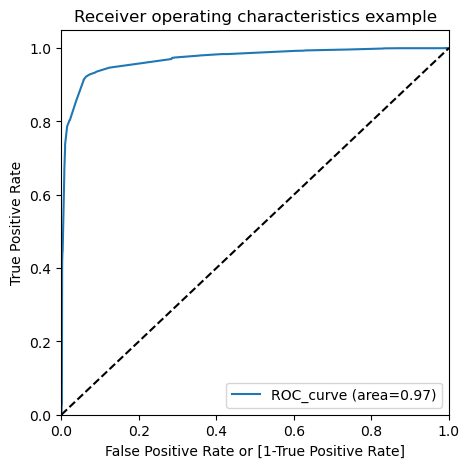

In [169]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.show()

##### Observation -
##### We have an AOC of 0.97 which is very optimal 

### Finding Optimal Cutoff Point

In [170]:
### Lets create columns with different probability cutoff
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x:1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1        0.964891          1    1    1    1    1    1    1    1   
1          1        0.995727          1    1    1    1    1    1    1    1   
2          1        0.964891          1    1    1    1    1    1    1    1   
3          0        0.027638          0    1    0    0    0    0    0    0   
4          0        0.115793          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  
0    1    1    1  
1    1    1    1  
2    1    1    1  
3    0    0    0  
4    0    0    0

In [171]:
### Now Lets calculate accuracy sensitivity and specificity for various probability cut offs
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy=(cm1[0,0]+cm1[1,1])/total1
    speci=cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi=cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i, accuracy,speci,sensi]
print(cutoff_df)    

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  0.000000  1.000000
0.1   0.1  0.812840  0.714544  0.973053
0.2   0.2  0.919468  0.909584  0.935579
0.3   0.3  0.930996  0.936451  0.922105
0.4   0.4  0.931476  0.942134  0.914105
0.5   0.5  0.931636  0.942392  0.914105
0.6   0.6  0.921710  0.961767  0.856421
0.7   0.7  0.911784  0.978042  0.803789
0.8   0.8  0.911944  0.979592  0.801684
0.9   0.9  0.891290  0.990442  0.729684


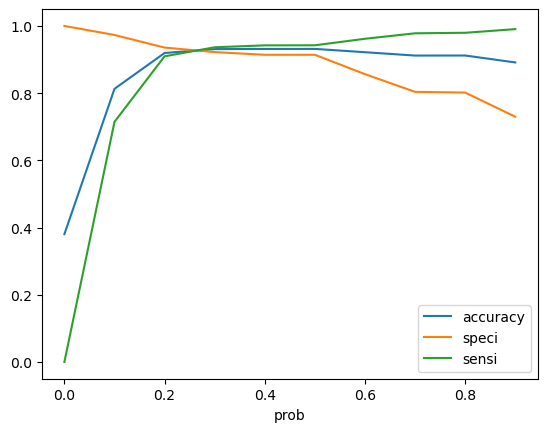

In [172]:
### Lets plot accuracy, sensitivity and specificity for various probability cutoff
cutoff_df.plot.line(x='prob', y=['accuracy','speci','sensi'])
plt.show()

## From the above curve 0.3 is the optimal point for cut off probability

In [173]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x:1 if x > 0.3 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1        0.964891          1    1    1    1    1    1    1    1   
1          1        0.995727          1    1    1    1    1    1    1    1   
2          1        0.964891          1    1    1    1    1    1    1    1   
3          0        0.027638          0    1    0    0    0    0    0    0   
4          0        0.115793          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    1    1    1                1  
1    1    1    1                1  
2    1    1    1                1  
3    0    0    0                0  
4    0    0    0                0

In [174]:
### Lets check overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.930995837335895

In [175]:
### Creating confusion matrix with new threshold
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3625,  246],
       [ 185, 2190]], dtype=int64)

In [176]:
TP=confusion2[1,1] # True Positive
TN=confusion2[0,0] # True Negative
FP=confusion2[0,1] # False Positive
FN=confusion2[1,0] # False Negative

In [177]:
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)

True Positive: 2190
True Negative: 3625
False Positive: 246
False Negative: 185


In [178]:
### Calculate sensitivity
TP/float(TP+FN)

0.9221052631578948

In [179]:
### Calculate specificity
TN/float(TN+FP)

0.9364505295789202

In [180]:
### Calculate false positive rate
print(FP/float(TP+FN))

0.10357894736842105


In [181]:
### Positive predictive value
print(TP/float(TP+FP))

0.8990147783251231


In [182]:
### Negative predictive value
print(TN/float(TN+FN))

0.9514435695538058


##### Observation -
##### This model performing well. Roc curve has optimal value 0.97 which is very good.
##### Accuracy - 93.09%
##### Sensitivity - 92.21%
##### Specificity - 93.64%

### Checking Precision and Recall

In [183]:
### Looking for confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion

array([[3625,  246],
       [ 185, 2190]], dtype=int64)

In [184]:
### Precision
#TP/TP+FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8990147783251231

In [185]:
### Recall
#TP/TP+FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9221052631578948

### Using sklearn utilities for the same

In [186]:
from sklearn.metrics import precision_score, recall_score

In [187]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8990147783251231

In [188]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9221052631578948

### Precision and Recall Tradeoff

In [189]:
from sklearn.metrics import precision_recall_curve

In [190]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6241    1
 6242    1
 6243    0
 6244    0
 6245    0
 Name: Converted, Length: 6246, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6241    1
 6242    1
 6243    0
 6244    0
 6245    0
 Name: final_predicted, Length: 6246, dtype: int64)

In [191]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

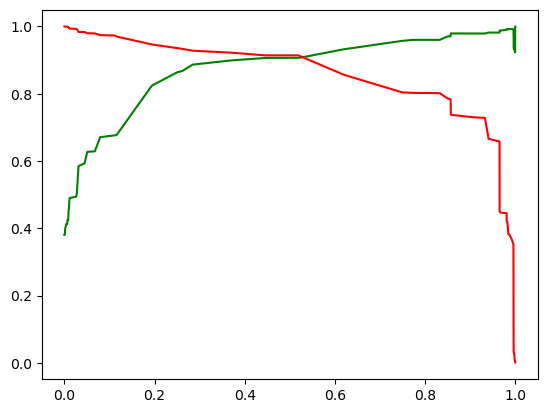

In [192]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making prediction on the test set

In [193]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [194]:
X_test = X_test[col]
X_test.head()

X_test = X_test.drop(['Tags_wrong number given'], axis=1)
X_test = X_test.drop(['Tags_invalid number'], axis=1)

In [195]:
X_test_sm = sm.add_constant(X_test)

In [196]:
### Making prediction on test set
y_test_pred = res.predict(X_test_sm)

In [197]:
y_test_pred[:10]

7625    0.044782
5207    0.964891
2390    0.995727
4362    0.067587
1023    0.044782
8226    0.964891
3079    0.115793
530     0.044782
7873    0.027638
5146    0.995727
dtype: float64

In [198]:
### converting y pred to a dataframe which has an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
7625  0.044782
5207  0.964891
2390  0.995727
4362  0.067587
1023  0.044782

In [199]:
### converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [200]:
### removing index for both dataframes to amend them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [201]:
### appendin y_test_df and y_pred_1
y_pred_final = pd.concat([y_pred_1, y_test_df], axis=1)

In [202]:
y_pred_final.head()

0  Converted
0  0.044782          0
1  0.964891          1
2  0.995727          1
3  0.067587          0
4  0.044782          0

In [203]:
###Renaming the column
y_pred_final = y_pred_final.rename(columns={0:'Converted_Prob'})

In [204]:
y_pred_final.head()

Converted_Prob  Converted
0        0.044782          0
1        0.964891          1
2        0.995727          1
3        0.067587          0
4        0.044782          0

In [205]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x:1 if x>0.3 else 0)

In [206]:
y_pred_final.head()

Converted_Prob  Converted  final_Predicted
0        0.044782          0                0
1        0.964891          1                1
2        0.995727          1                1
3        0.067587          0                0
4        0.044782          0                0

# Model Evaluation

In [207]:
### Lets check overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9339058999253174

In [208]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted)
confusion2

array([[1580,  104],
       [  73,  921]], dtype=int64)

In [209]:
TP=confusion2[1,1] # True Positive
TN=confusion2[0,0] # True Negative
FP=confusion2[0,1] # False Positive
FN=confusion2[1,0] # False Negative

In [210]:
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)

True Positive: 921
True Negative: 1580
False Positive: 104
False Negative: 73


In [211]:
### sensitivity
TP/float(TP+FN)

0.9265593561368209

In [212]:
### specificity
TN/float(TN+FP)

0.9382422802850356

In [213]:
### precision score
precision_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8985365853658537

In [214]:
### recall score
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9265593561368209

# Final Observation

## Train Data
### Accuracy:  93.09%
### Sensitivity:  92.21%
### Specificity:  93.64%


## Test Data
### Accuracy:  93.39%
### Sensitivity:  92.65%
### Specificity:  93.82%